## Buyer Intent Classification

Data source: [Kaggle](https://www.kaggle.com/sohelranaccselab/online-shoppers-purchasing-intention-dataset)

Data columns description:<br/>
- 'Administrative': 'Number of pages visited by the visitor about account management',
- 'Administrative_Duration': 'Total seconds spent viewing account management related pages', 
- 'Informational' : 'Number of informational pages visited by the visitor', 
- 'Informational_Duration' : 'Total seconds spent viewing informational pages', 
- 'ProductRelated' : 'Number of product pages visited by the visitor', 
- 'ProductRelated_Duration' : 'Total seconds spent viewing informational pages', 
- 'BounceRates' : 'Average bounce rate value of the pages visited by visitor', 
- 'ExitRates' : 'Average exit rate value of the pages visited by visitor',
- 'PageValues' : '',
- 'SpecialDay' : 'Closeness of the visit date to a special trading day', 
- 'OperatingSystems' : 'The operating system used on the visit', 
- 'Browser' : 'The browser used on the visit', 
- 'Weekend' : 'A Boolean value indicating whether the visit was on a weekend', 
- 'Month' : 'The month of the visit', 
- 'Revenue' : 'A class label indicating whether the customer purchased', 
- 'Region' : '', 
- 'TrafficType': '', 
- 'VisitorType': ''

#### Project description:
An online music stroe is designing a campaign to give likely buyers a free download of their music of choice while they are on the webiste. The goal of the campaign is to create trust, encourage visitors to explore more of the website which in turn is expected to increase revenue. Develope a model that identifies the likely buyers.

#### Content
1. Importing required libraries
2. Data loading & preperation
	- Transforming Categorical Variables
	- Encoding categorical variables
	- Numerical Downcasting
3. Exploratory Data Analysis
	- Univariate Analysis
		- Target Variable
		- Categorical Features
		- Continuous Features
	- Multivariate Analysis
4. Classification
	- Splitting Train_Test
	- Feature Engineering Analysis
		- Feature Transformation & Scaling
		- Feature Selection & Feature extraction
			- Principal component analysis(PCA)
	- Handling Imbalanced Data
		- No Imbalance Handling
		- Resampling with RandomOverSampler
		- SMOTE-Tomek Links method
5. ML Pipeline
	- Designing the Pipeline
		- Data loading & cleaning
		- Train test split
		- Preprocessing
		- Fitting the model
		- Evaluating the model
		- Comparing models
	- Pipeline implementation
		- Selecting the performance metric
		- Selecting classifiers
		- Selecting the best model using Cross-Validation
		- Hyperparameter tuning

### 1. Importing required libraries

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import time

# Random State
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# import gc
# # import warnings
# # warnings.filterwarnings("ignore")

# # check the venv we are using
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Transformers
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

# Feature Selection
# from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.decomposition import PCA

# Sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, auc, roc_auc_score, precision_score, average_precision_score, f1_score
from sklearn.metrics import recall_score, confusion_matrix, make_scorer, precision_recall_curve, RocCurveDisplay
# from statsmodels.stats.outliers_influence import variance_inflation_factor  #to calculate VIF

# Pipelines
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
# from sklearn.dummy import DummyClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import RidgeClassifier
# from sklearn.linear_model import SGDClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import ExtraTreeClassifier
# from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.neural_network import MLPClassifier

#suppress warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# #suppress warnings
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
# visualiztion settings
plt.style.use('ggplot')
sns.set_context('notebook')

### 2. Data loading & preperation

In [4]:
# loading the data
url = r'C:\Users\mahno\_projects_data\online_shoppers_intention.csv'
df = pd.read_csv(url)
df.columns = df.columns.str.lower()
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           12330 non-null  int64  
 1   administrative_duration  12330 non-null  float64
 2   informational            12330 non-null  int64  
 3   informational_duration   12330 non-null  float64
 4   productrelated           12330 non-null  int64  
 5   productrelated_duration  12330 non-null  float64
 6   bouncerates              12330 non-null  float64
 7   exitrates                12330 non-null  float64
 8   pagevalues               12330 non-null  float64
 9   specialday               12330 non-null  float64
 10  month                    12330 non-null  object 
 11  operatingsystems         12330 non-null  int64  
 12  browser                  12330 non-null  int64  
 13  region                   12330 non-null  int64  
 14  traffictype           

In [5]:
# changing the column labels to make them more readable
df.rename(columns={'administrative': 'admin_pviews', 'administrative_duration':'admin_pview_duration', 
    'informational': 'info_pviews', 'informational_duration': 'info_pview_duration', 'productrelated': 'products_pviews', 
    'productrelated_duration': 'products_pview_duration', 'bouncerates': 'bounce_rates', 
    'exitrates': 'exit_rates', 'pagevalues': 'page_values', 'specialday': 'special_day',
    'operatingsystems': 'operating_systems', 'traffictype': 'traffic_type', 'visitortype': 'visitor_type', 
    'revenue': 'conversion'
    }, inplace=True)

In [6]:
# returning some descreptives for the dataframe
def check_df(df):
    
    df_info = pd.DataFrame(columns=['column', 'dtype', 'count', 'nulls', 'min', 'max', 'smaple_value'])
    for col in df.columns:
        if df[col].dtype != object:
            df_info = df_info.append({'column':col, 'dtype':df[col].dtype, 'count':df[col].count(), 'nulls':df[col].isna().sum(), 'min':df[col].min(), 'max':df[col].max(), 'smaple_value':df[col][0]}, ignore_index=True)
        else:
            df_info = df_info.append({'column':col, 'dtype':df[col].dtype, 'count':df[col].count(), 'nulls':df[col].isna().sum(), 'min':np.nan, 'max':np.nan, 'smaple_value':df[col][0]}, ignore_index=True)

    return df_info

In [7]:
check_df(df)

,column,dtype,count,nulls,min,max,smaple_value
0,admin_pviews,int64,12330,0,0,27,0
1,admin_pview_duration,float64,12330,0,0.0,3398.75,0.0
2,info_pviews,int64,12330,0,0,24,0
3,info_pview_duration,float64,12330,0,0.0,2549.375,0.0
4,products_pviews,int64,12330,0,0,705,1
5,products_pview_duration,float64,12330,0,0.0,63973.52223,0.0
6,bounce_rates,float64,12330,0,0.0,0.2,0.2
7,exit_rates,float64,12330,0,0.0,0.2,0.2
8,page_values,float64,12330,0,0.0,361.763742,0.0
9,special_day,float64,12330,0,0.0,1.0,0.0


#### Transforming Categorical Variables

In [8]:
# inspecting categorical features
def check_non_numerics(df):
    df_categories = df.select_dtypes(exclude=['number']).agg(['count', 'nunique']).T
    df_categories['categories'] = '-'
    for row in df_categories.index:
        df_categories.at[row, 'categories'] = df[row].unique()
    return df_categories

In [9]:
check_non_numerics(df)

,count,nunique,categories
month,12330,10,"[Feb, Mar, May, Oct, June, Jul, Aug, Nov, Sep,..."
visitor_type,12330,3,"[Returning_Visitor, New_Visitor, Other]"
weekend,12330,2,"[False, True]"
conversion,12330,2,"[False, True]"


In [10]:
df.visitor_type.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: visitor_type, dtype: int64

##### Encoding categorical variables

Ordinal Encoding:

In [11]:
# Encoding months as ordinal since the sequence matters
enc = OrdinalEncoder(categories=[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']], handle_unknown='error')
df['month'] = enc.fit_transform(df[['month']])

One-Hot Encoding:

In [12]:
# we are interested to see if a Visitor is a returning visitor or not
df['visitor_type'] = np.where(df['visitor_type']=='Returning_Visitor', 1, 0) 

df['weekend'] = np.where(df['weekend']==True, 1, 0)
df['conversion'] = np.where(df['conversion']==True, 1, 0)

##### Numerical Downcasting

In [13]:
# Downcasting the numbers for memory efficiency
def downcast_df(df):
    
    ## downcasting floats
    f_cols= df.select_dtypes(['float', 'float64']).columns
    df[f_cols] = df[f_cols].apply(pd.to_numeric, downcast='float')

    ## downcasting ints
    i_cols = df.select_dtypes(['integer', 'int', 'int32']).columns
    df[i_cols] = df[i_cols].apply(pd.to_numeric, downcast='unsigned')

    return df

In [14]:
# reducing the size of the df by downcasting
df = downcast_df(df)
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   admin_pviews             12330 non-null  uint8  
 1   admin_pview_duration     12330 non-null  float32
 2   info_pviews              12330 non-null  uint8  
 3   info_pview_duration      12330 non-null  float32
 4   products_pviews          12330 non-null  uint16 
 5   products_pview_duration  12330 non-null  float32
 6   bounce_rates             12330 non-null  float32
 7   exit_rates               12330 non-null  float32
 8   page_values              12330 non-null  float32
 9   special_day              12330 non-null  float32
 10  month                    12330 non-null  float32
 11  operating_systems        12330 non-null  uint8  
 12  browser                  12330 non-null  uint8  
 13  region                   12330 non-null  uint8  
 14  traffic_type          

### 3. Exploratory Data Analysis

In [15]:
# creating features dataframe
# df_features = df.drop(columns='conversion')

# seperating continous and categorical features
continuous_features = ['admin_pviews', 'admin_pview_duration', 'info_pviews', 'info_pview_duration', 'products_pviews', 'products_pview_duration', 'bounce_rates', 'exit_rates', 'page_values']
categorical_features = ['special_day', 'month', 'operating_systems', 'browser', 'region', 'traffic_type', 'visitor_type', 'weekend']

#### Univariate Analysis

##### Target Variable

The target variable is moderately imbalanced.

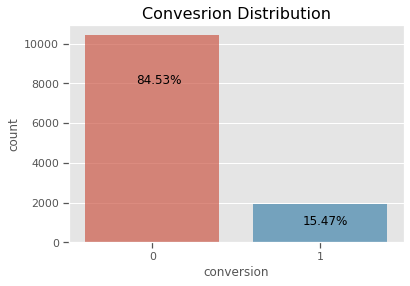

In [16]:
# calculating percentage of each category in target variable
category_pct = df.conversion.value_counts(normalize=True).mul(100).round(2)

plt.figure(figsize=(6, 4))
sns.countplot(x=df.conversion, alpha=0.7, order=category_pct.index)
plt.annotate(f'{str(category_pct[0])}%', xy=(-0.1, 8000))
plt.annotate(f'{str(category_pct[1])}%', xy=(0.9, 900))
plt.title('Convesrion Distribution', fontsize=16)
plt.show()

##### Categorical Features

In [17]:
# plotting the ditribution for dataframe columns
def plot_distribution(df, n_rows, n_columns, figsize=(12, 12), type='histogram', title='Distribution'):
    
    fig, axs = plt.subplots(n_rows, n_columns, figsize=figsize)

    for column, ax in zip(df.columns, axs.ravel()):
        if type == 'histogram':
            sns.histplot(data=df[column], ax=ax)
        elif type == 'boxplot':
            sns.boxplot(data=df[column], orient='h', ax=ax)
        else:
            return f'Select chart type: [histogram, boxplot]'
        ax.set_xlabel(column)

    plt.suptitle(f'{title} - {type.title()}')
    plt.tight_layout()
    plt.show()

In [18]:
# Inspecting categorical features
for i in df[categorical_features]:
    print(f'{i}: {df[i].sort_values().unique()}')

special_day: [0.  0.2 0.4 0.6 0.8 1. ]
month: [ 1.  2.  4.  5.  6.  7.  8.  9. 10. 11.]
operating_systems: [1 2 3 4 5 6 7 8]
browser: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
region: [1 2 3 4 5 6 7 8 9]
traffic_type: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
visitor_type: [0 1]
weekend: [0 1]


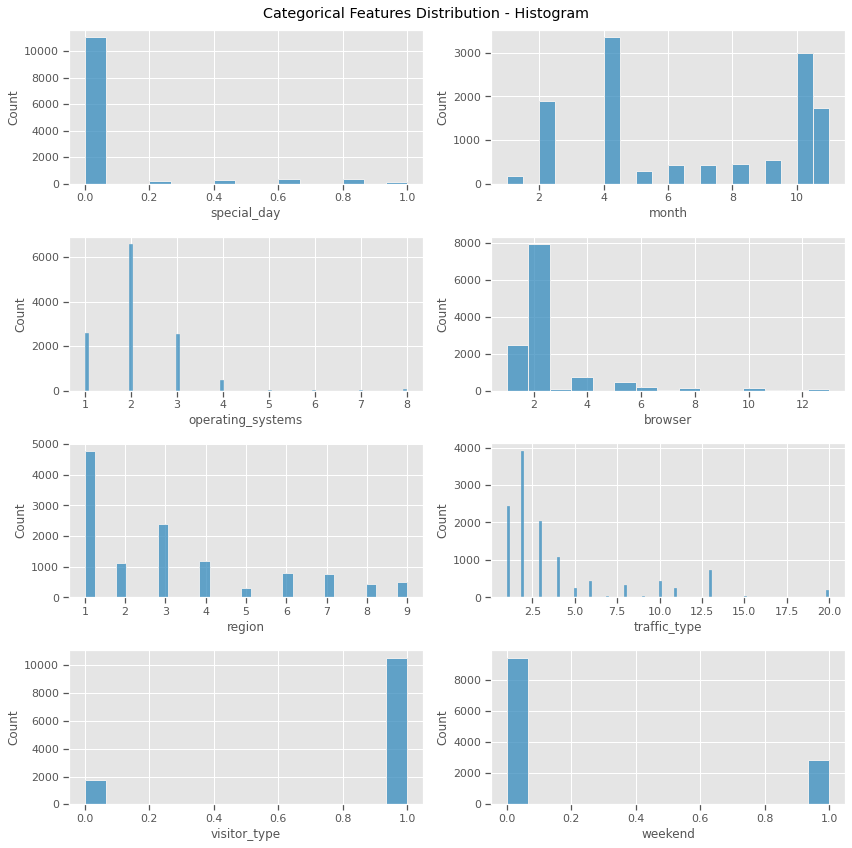

In [19]:
plot_distribution(df[categorical_features], n_rows=4, n_columns=2, figsize=(12, 12), type='histogram', title='Categorical Features Distribution')

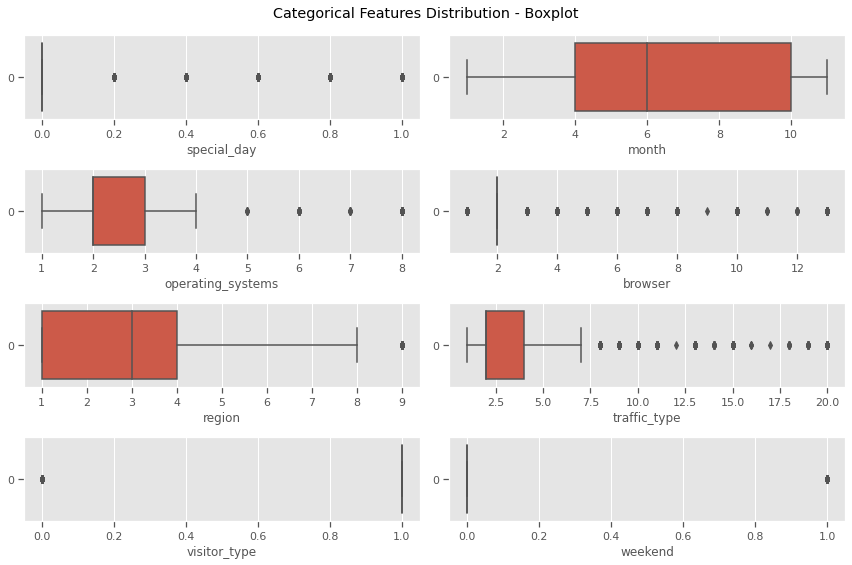

In [20]:
plot_distribution(df[categorical_features], n_rows=4, n_columns=2, figsize=(12, 8), type='boxplot', title='Categorical Features Distribution')

##### Continuous Features

In [21]:
# Inspecting continous features
df[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
admin_pviews,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
admin_pview_duration,12330.0,80.818611,176.779114,0.0,0.000000,7.500000,93.256252,3398.750000
info_pviews,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
info_pview_duration,12330.0,34.472397,140.749298,0.0,0.000000,0.000000,0.000000,2549.375000
products_pviews,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
products_pview_duration,12330.0,1194.746216,1913.669312,0.0,184.137505,598.936890,1464.157196,63973.523438
bounce_rates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
exit_rates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
page_values,12330.0,5.889257,18.568436,0.0,0.000000,0.000000,0.000000,361.763733


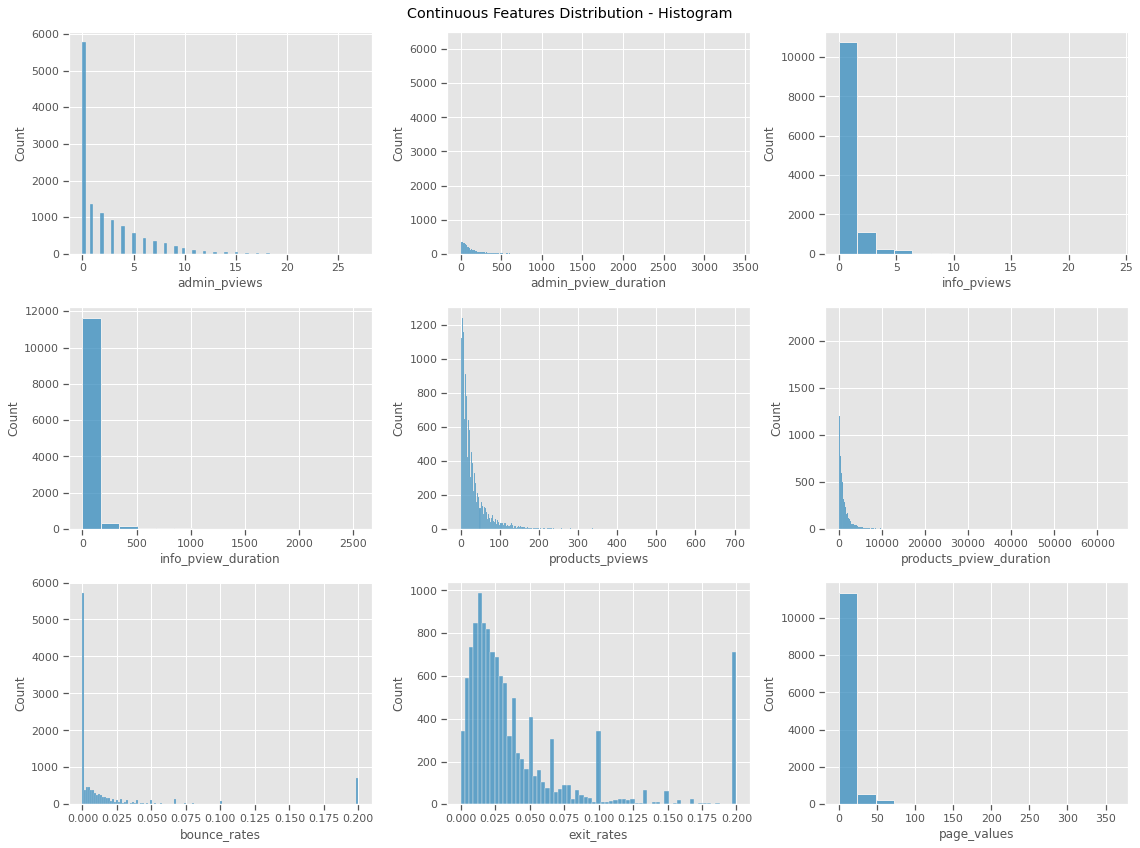

In [22]:
plot_distribution(df[continuous_features], n_rows=3, n_columns=3, figsize=(16, 12), type='histogram', title='Continuous Features Distribution')

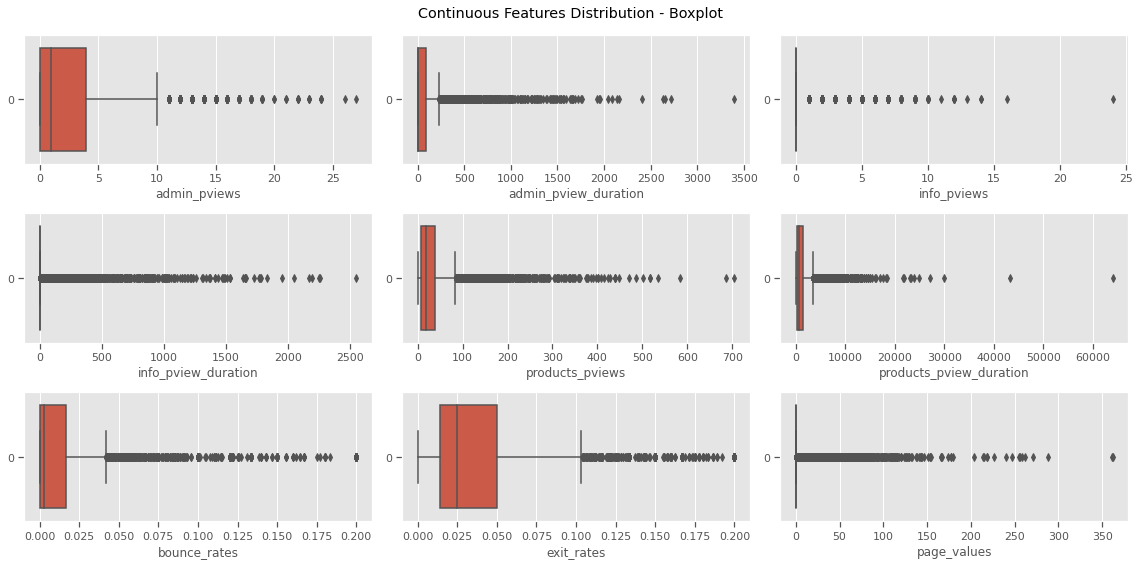

In [23]:
plot_distribution(df[continuous_features], n_rows=3, n_columns=3, figsize=(16, 8), type='boxplot', title='Continuous Features Distribution')

All features are skewed to the right with plenty of outliers.

<strong>products_pview_duration anomalies</strong>

Looking at the data, we have 2 data points that are extremely far from them mean

In [24]:
df.products_pview_duration.sort_values(ascending=False).head(10)

8071    63973.523438
5152    43171.234375
9238    29970.466797
8784    27009.859375
8308    24844.156250
7662    23888.810547
6684    23342.082031
6165    23050.103516
5916    21857.046875
8972    21672.244141
Name: products_pview_duration, dtype: float32

In [25]:
df.products_pview_duration.describe()

count    12330.000000
mean      1194.746216
std       1913.669312
min          0.000000
25%        184.137505
50%        598.936890
75%       1464.157196
max      63973.523438
Name: products_pview_duration, dtype: float64

We drop these 2 data points which are likely caused by the page left open on the computer perhaps overnight. At a certain point, viewing a page for a longer period won't likely change the chance of conversion.<br/>
For other outliers, we use other techniques in our ML algorithm to handle them.

In [26]:
df.loc[df.products_pview_duration > 40000].index

Int64Index([5152, 8071], dtype='int64')

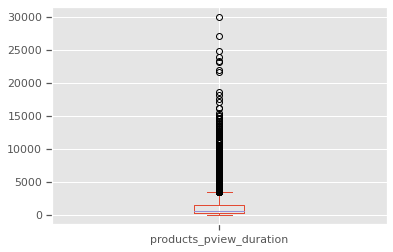

In [27]:
# dropping the anomalies
df.drop(index=df.loc[df.products_pview_duration > 40000].index, inplace=True)
df.products_pview_duration.plot(kind='box')
plt.show()

<strong>Skewness</strong>

All continuous features have a skewness over 1 and are highly skewed. We may need to use power transformer on continous columns.

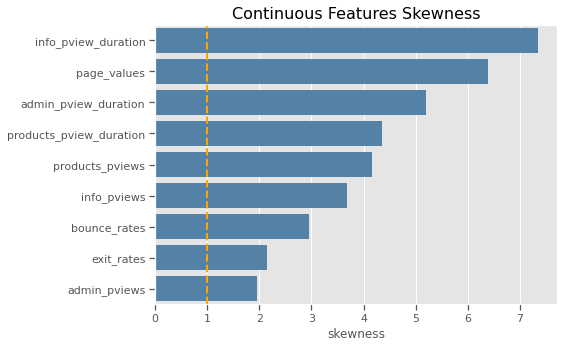

In [28]:
# calculating skewness for columns and creating a df for the results
features_skewness_df = pd.DataFrame(stats.skew(df[continuous_features]), index=continuous_features).rename(columns={0:'skewness'}).sort_values(by='skewness', ascending=False)

# plotting the skewness level for each column
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(y=features_skewness_df.index, x=features_skewness_df.skewness, color='steelblue', orient='h')
ax.axvline(x=1, linestyle='--', lw=2, color='orange')
ax.set_title('Continuous Features Skewness', fontsize=16)
plt.tight_layout()
plt.show()

<strong>Magnitude of features</strong>

The below chart shows the order of magnitude of continuous variables and products pageview duration has significantly higher magnitude compare to the rest of the variables.

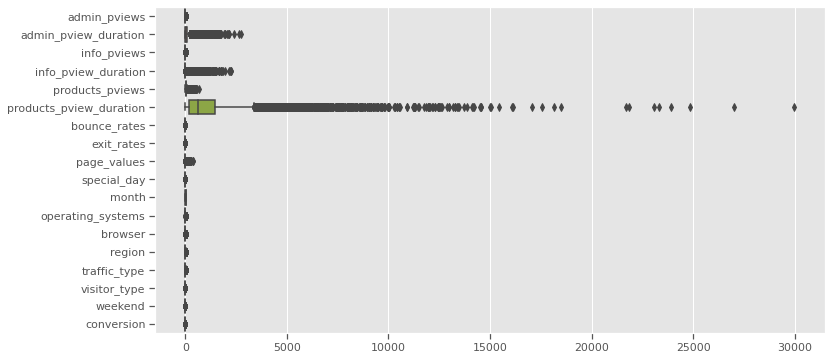

In [29]:
# plotting the distribution of continuous features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')
plt.show()

In [30]:
# continuous features standard deviations
df[continuous_features].std().sort_values(ascending=False)

products_pview_duration    1788.852417
admin_pview_duration        172.730392
info_pview_duration         137.734055
products_pviews              43.903153
page_values                  18.569809
admin_pviews                  3.319331
info_pviews                   1.251526
exit_rates                    0.048600
bounce_rates                  0.048492
dtype: float64

#### Multivariate Analysis

As expected, 'products_pviews' and 'products_pview_duration' as well as 'bounce_rates' and 'exit_rates' are highly corrolated.

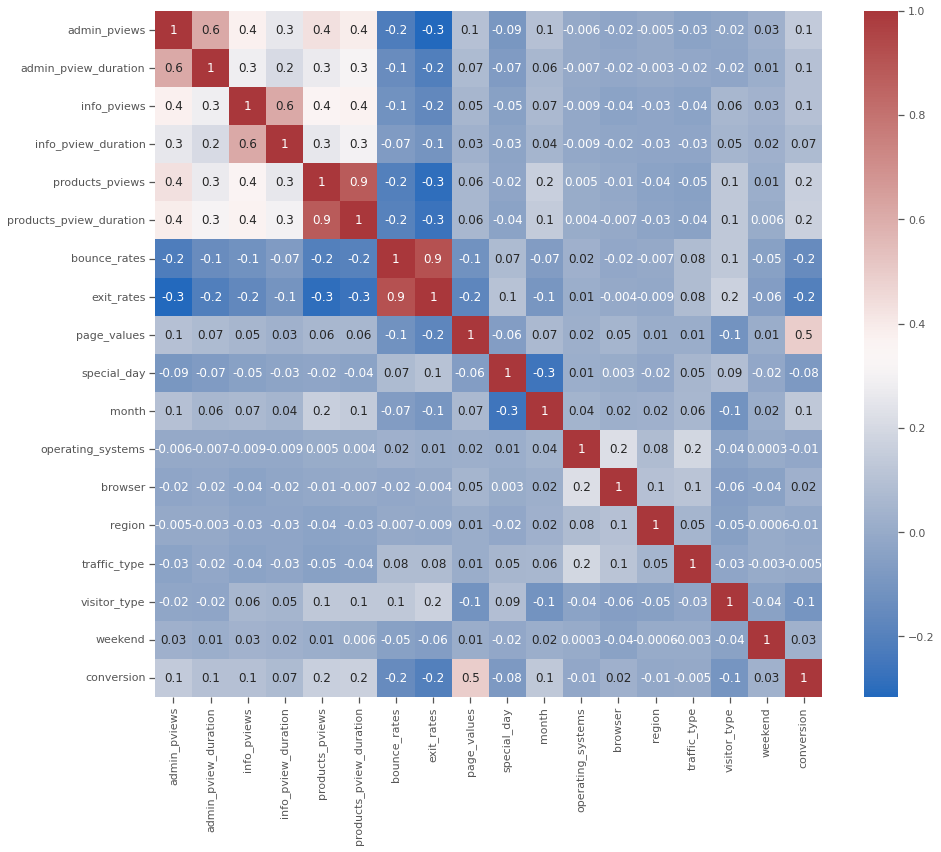

In [31]:
# plotting corrolations between features
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, fmt=".1g", cmap='vlag')
plt.tight_layout()
plt.show()

<strong>Feature Importance</strong>

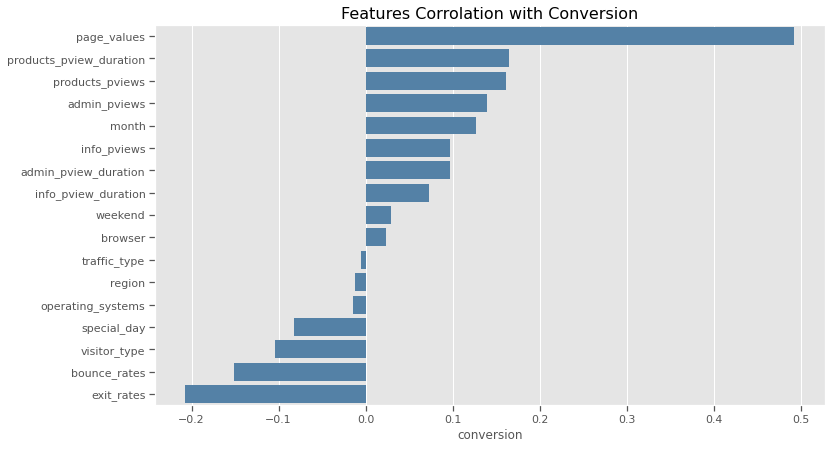

In [32]:
# page_values has the highest corrolation to the conversion
df_conversion_corr = df.corr()['conversion'].sort_values(ascending=False).iloc[1:]

plt.figure(figsize=(12, 7))
sns.barplot(y=df_conversion_corr.index, x=df_conversion_corr, orient='h', color='steelblue')
plt.title('Features Corrolation with Conversion', fontsize=16)
plt.show()

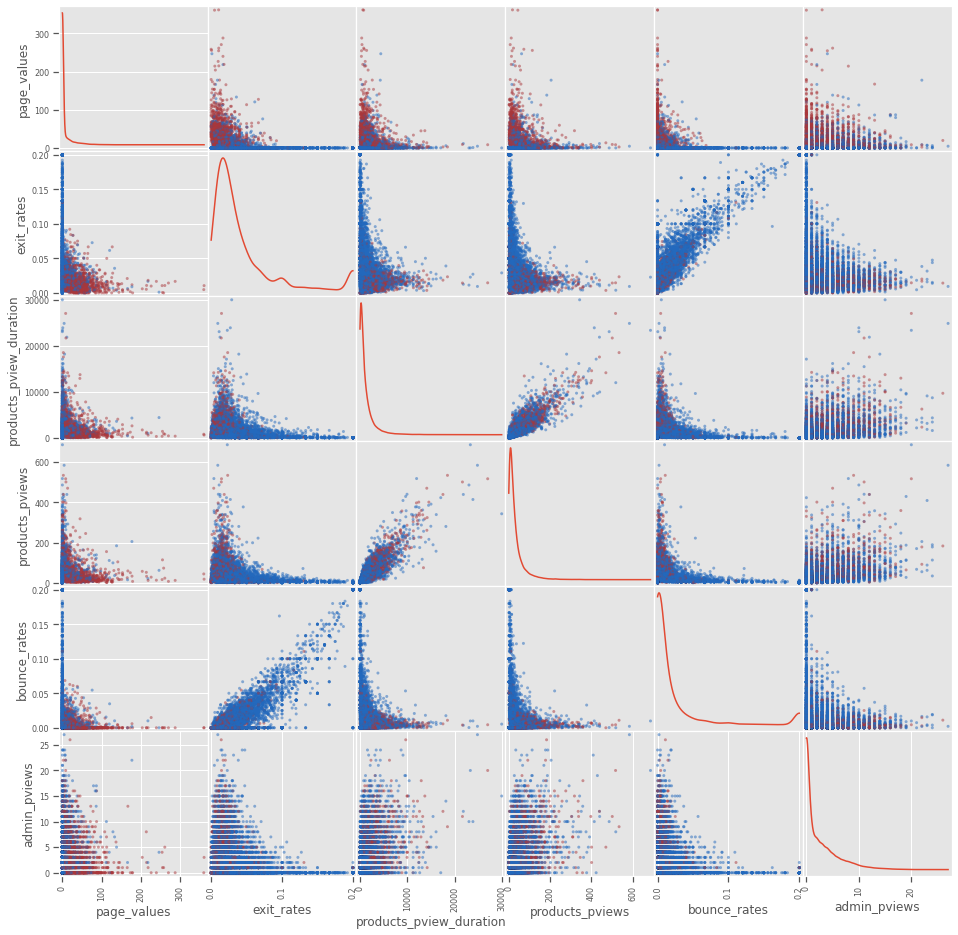

In [33]:
# scatter plot of the most correlated features with conversion
most_corrolated_features = abs(df_conversion_corr).sort_values(ascending=False).head(6).index

pd.plotting.scatter_matrix(df[most_corrolated_features], c=df.conversion, cmap='vlag', alpha=0.5, diagonal= 'kde', figsize=(16, 16))
plt.show()

By inspecting each feature's ditribution per conversion class (converted vs non converted or 1 vs 0), we can see how much of the traget variable (conversion) can be explained by that feature (no or less box overalps).
Features that have different distribution for ecah converion class (e.g. different means and variance) are more informative thus more valuable.

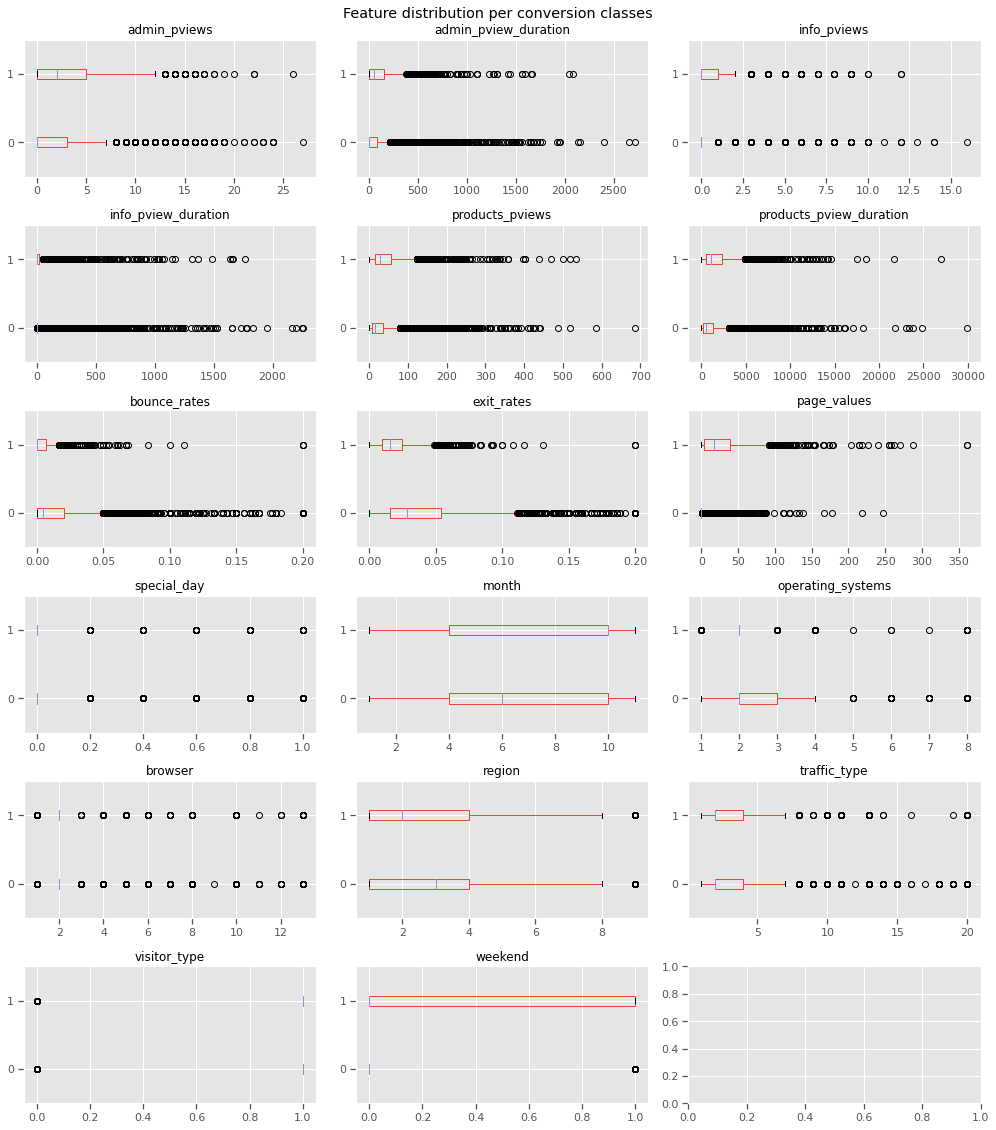

In [34]:
# plotting features distributions by conversion categories
fig, axs = plt.subplots(6, 3, figsize=(14, 16))

for feature, ax in zip(df.iloc[:, :-1].columns, axs.ravel()) :
    df[[feature, 'conversion']].boxplot(by='conversion', vert=False, ax=ax)
    ax.set_xlabel('')

plt.suptitle('Feature distribution per conversion classes')
plt.tight_layout()
plt.show()

Looking at the plot, it seems we have some redundancy in features, e.g. visitor_type or special_day. To address such redundencies and correlation between features in our model, we can use techniques like PCA.

### 4. Classification

#### Splitting Train_Test

Since target variable is imbalanced, we stratify our data while splitting to have equal percentage of [0, 1] in the target variable in each set.

In [35]:
# creating features df and target variable series
X = df.drop(columns=['conversion'])
y = df['conversion']

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

#### Feature Engineering Analysis

##### Feature Transformation & Scaling

There are outliers present in our dataset that need our attention. The outliers in our data are assumed to be present due to the nature of the business with varied influence on the target variable.<br/>

<strong>Impact of scaling on data</strong>

Let's see how our data behaves when we use scalers & transformers on our data:

In [36]:
# Evaluating the best scaler that doesn't distort the natural distribution of the features

df_X_train_scaled_sc = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X.columns)
df_X_train_scaled_mx = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns=X.columns)
df_X_train_scaled_rb = pd.DataFrame(RobustScaler().fit_transform(X_train), columns=X.columns)

# We add 1 to data since we have zeros in our data
df_X_train_scaled_log = np.log(X_train + 1)

# We use method='yeo-johnson' instead of Box-Cox transform since we have zeros in our data and Box-Cox can't handle them
df_X_train_scaled_pt = pd.DataFrame(PowerTransformer(method='yeo-johnson', standardize=True).fit_transform(X_train), columns=X.columns)

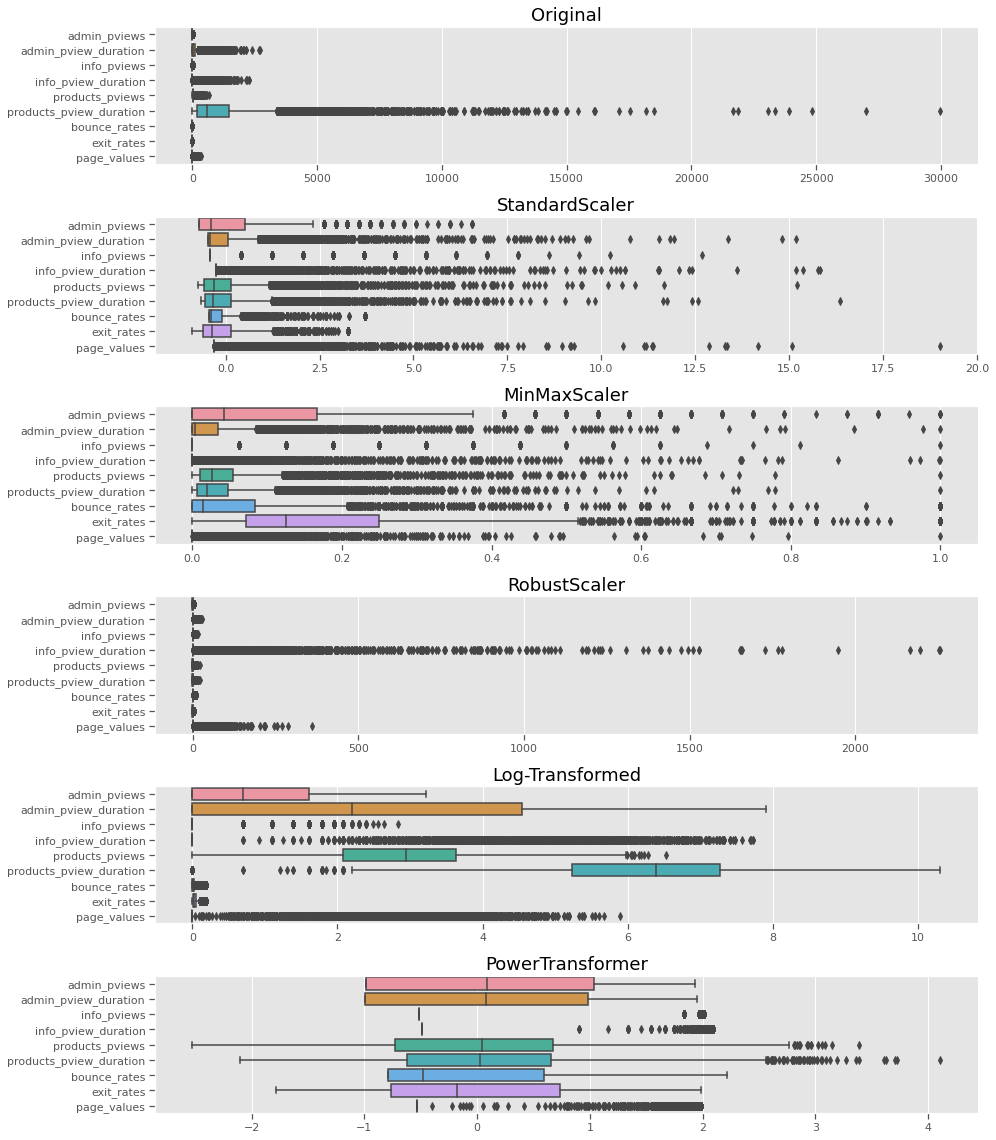

In [37]:
# Plotting scaled training set
fig, axs = plt.subplots(6, 1, figsize=(14, 16))

sns.boxplot(data=df[continuous_features], ax=axs[0], orient='h')
sns.boxplot(data=df_X_train_scaled_sc[continuous_features], ax=axs[1], orient='h')
sns.boxplot(data=df_X_train_scaled_mx[continuous_features], ax=axs[2], orient='h')
sns.boxplot(data=df_X_train_scaled_rb[continuous_features], ax=axs[3], orient='h')
sns.boxplot(data=df_X_train_scaled_log[continuous_features], ax=axs[4], orient='h')
sns.boxplot(data=df_X_train_scaled_pt[continuous_features], ax=axs[5], orient='h')

axs[0].set_title('Original', fontsize=18)
axs[1].set_title('StandardScaler', fontsize=18)
axs[2].set_title('MinMaxScaler', fontsize=18)
axs[3].set_title('RobustScaler', fontsize=18)
axs[4].set_title('Log-Transformed', fontsize=18)
axs[5].set_title('PowerTransformer', fontsize=18)

plt.tight_layout()
plt.show()

We can see that RobustScaler has distorted the relationship between features significantly.

Let's check the impact of scaling on each feature distribution.

<strong>StandardScaler</strong>

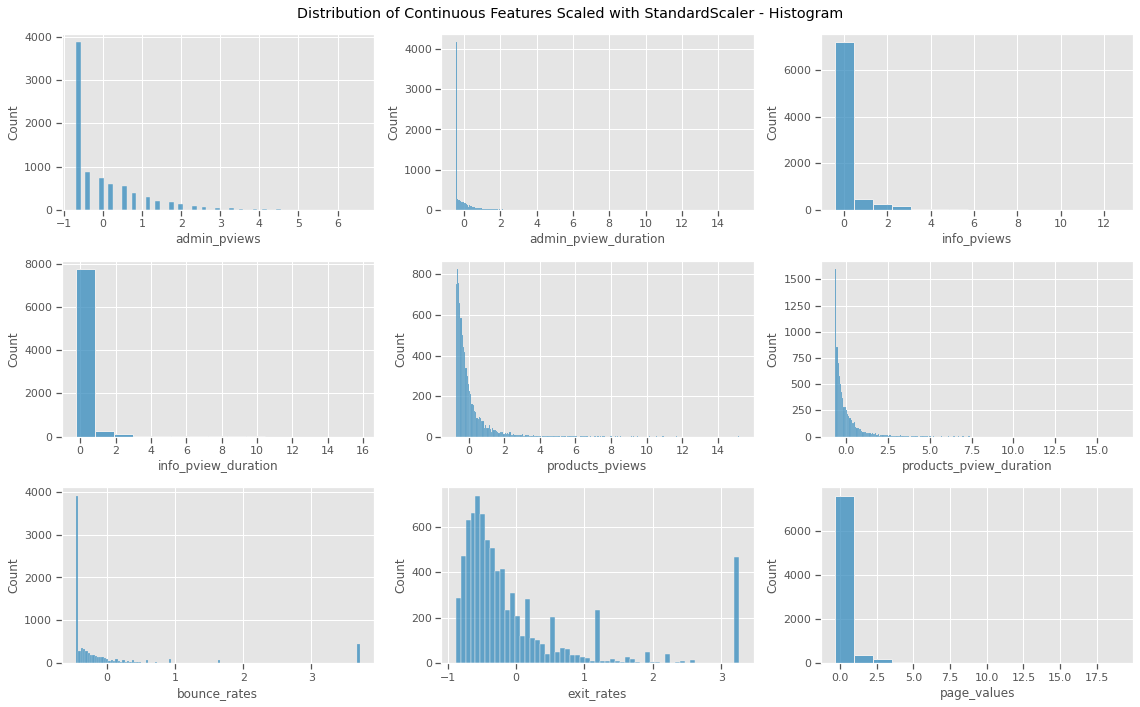

In [38]:
plot_distribution(df_X_train_scaled_sc[continuous_features], n_rows=3, n_columns=3, figsize=(16, 10), type='histogram', title='Distribution of Continuous Features Scaled with StandardScaler')

<strong>MinMaxScaler</strong>

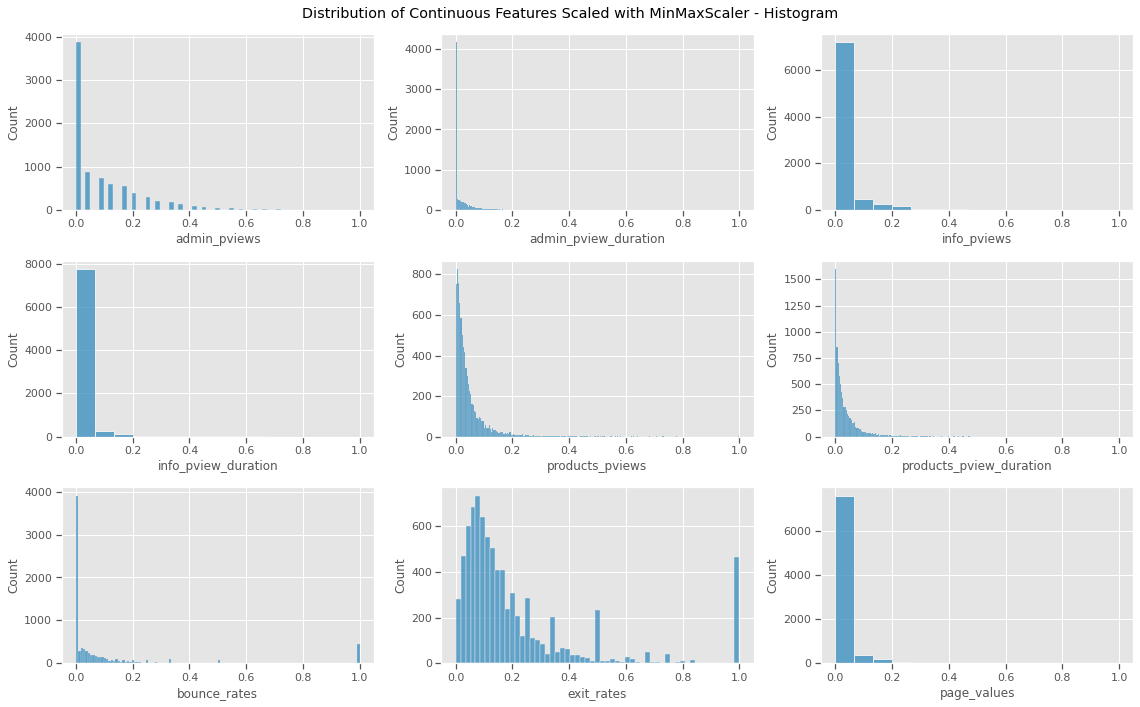

In [39]:
plot_distribution(df_X_train_scaled_mx[continuous_features], n_rows=3, n_columns=3, figsize=(16, 10), type='histogram', title='Distribution of Continuous Features Scaled with MinMaxScaler')

<strong>RobustScaler</strong>

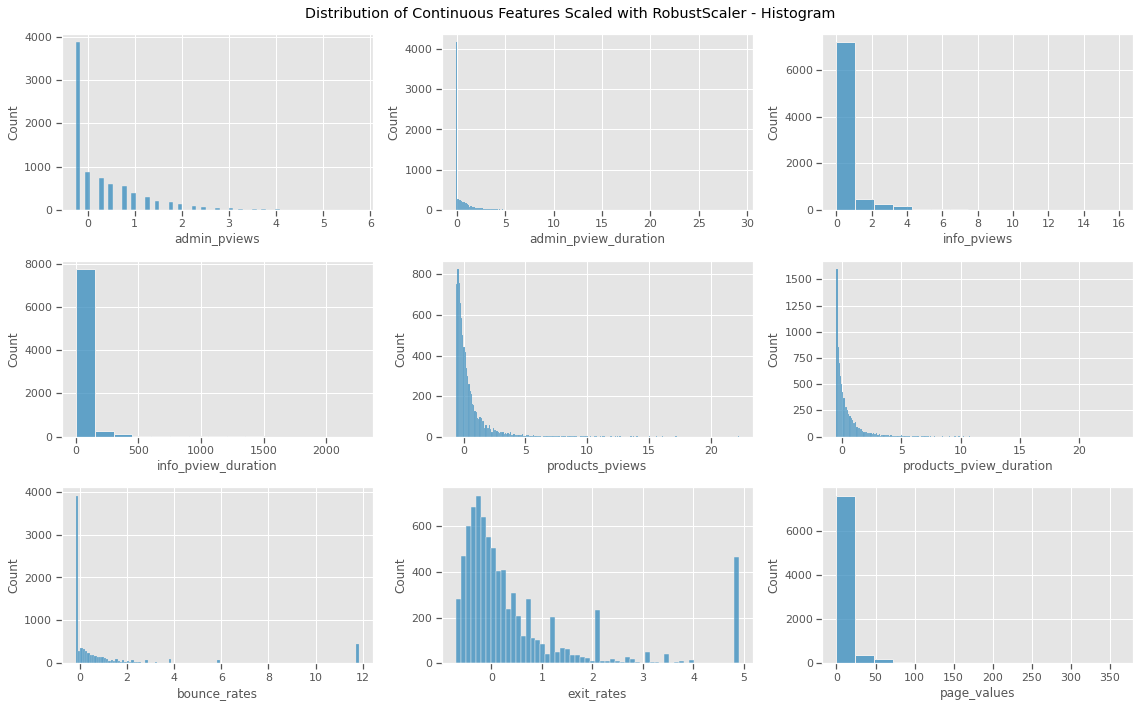

In [40]:
plot_distribution(df_X_train_scaled_rb[continuous_features], n_rows=3, n_columns=3, figsize=(16, 10), type='histogram', title='Distribution of Continuous Features Scaled with RobustScaler')

<strong>Log Transformation</strong>

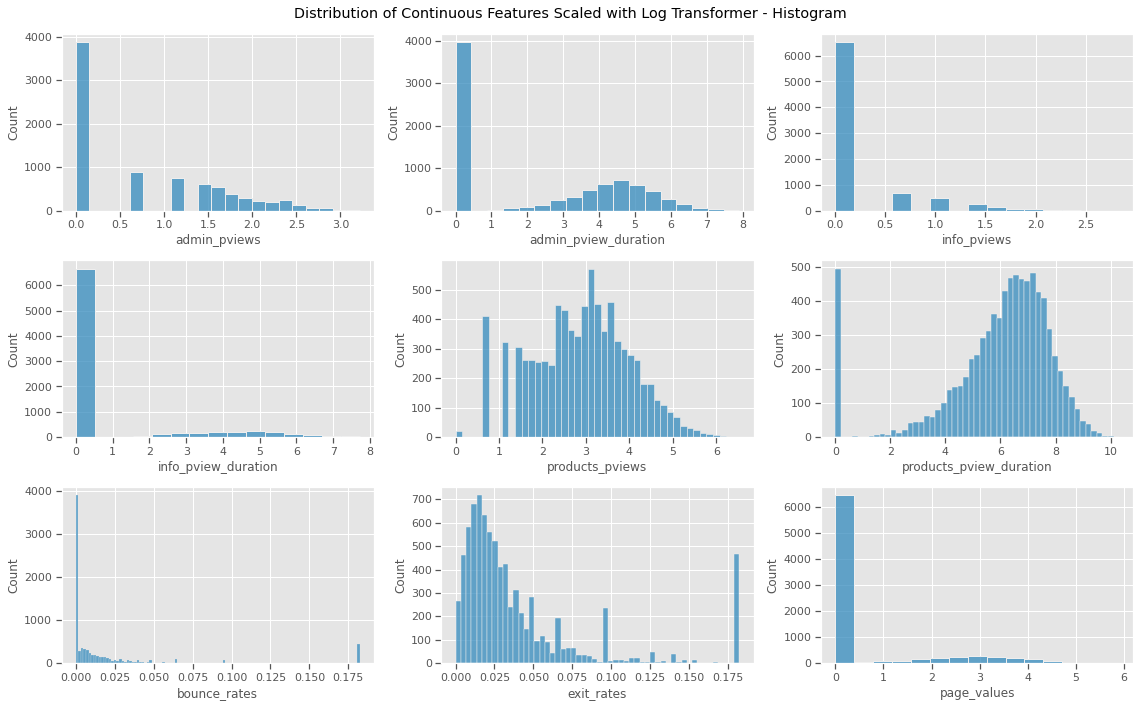

In [41]:
plot_distribution(df_X_train_scaled_log[continuous_features], n_rows=3, n_columns=3, figsize=(16, 10), type='histogram', title='Distribution of Continuous Features Scaled with Log Transformer')

<strong>PowerTransformer</strong>

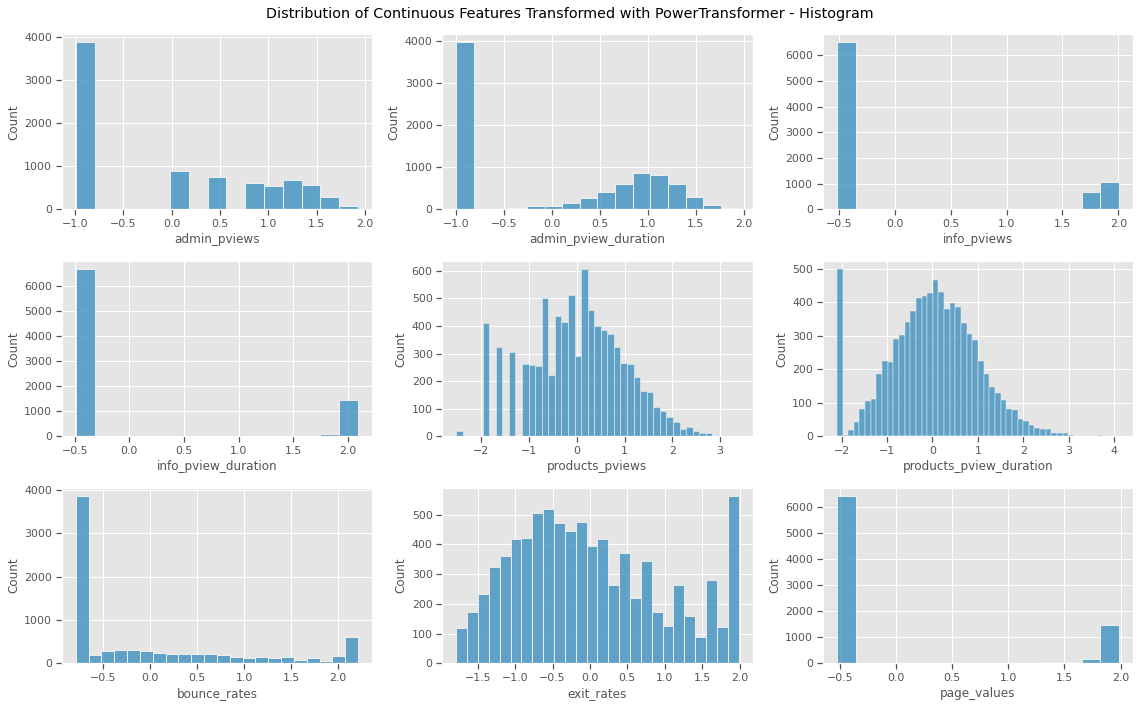

In [42]:
plot_distribution(df_X_train_scaled_pt[continuous_features], n_rows=3, n_columns=3, figsize=(16, 10), type='histogram', title='Distribution of Continuous Features Transformed with PowerTransformer')

As expected, StandardScaler, MinMaxScaler and RobustScaler kept the original distribution in the data while Log and Power transformations changed the data distribution trying to stabilize the variance and make it more Gaussian.<br/>
We decide to use StandardScaler for the rest of our feature enginieering analysis section.

#### Feature Selection & Feature extraction

##### Principal component analysis(PCA)
As we inspected earlier, we are facing with some collinearity among features as well as some redundencies since variance in some features doesn't define the target classes.
We perform PCA to both solve the collinearity problem and also reduce the number of features that don't have significant impact on the target classification.

In [44]:
# fitting PCA to the sclaed training set
pca_fit_initial = PCA().fit(df_X_train_scaled_sc)

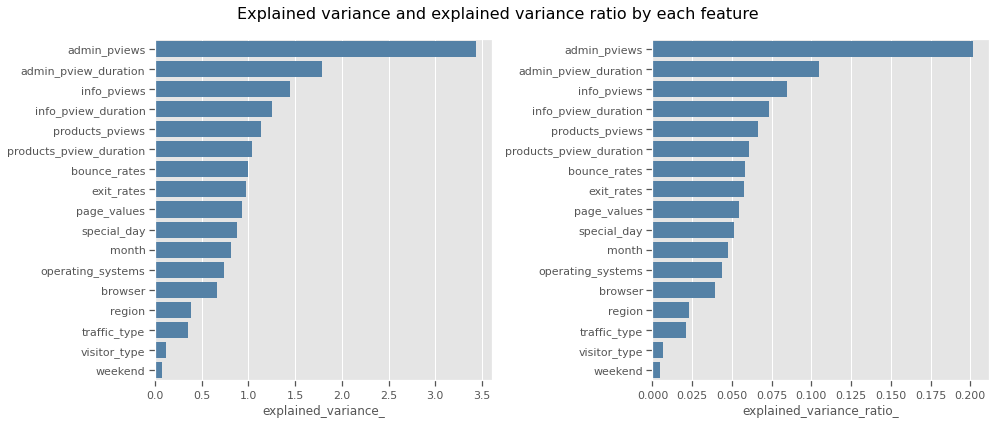

In [45]:
# creating a df for pca model attributes
df_pca_explained = pd.DataFrame(index=pca_fit_initial.feature_names_in_)

# getting the the amount of variance explained by each of the selected components
df_pca_explained['explained_variance_'] = pca_fit_initial.explained_variance_
# getting the the percentage of variance explained by each of the selected components
df_pca_explained['explained_variance_ratio_'] = pca_fit_initial.explained_variance_ratio_

# plotting the pca attributes
fix, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(y=df_pca_explained.index, x=df_pca_explained['explained_variance_'], orient='h', ax=axs[0], color='steelblue')
sns.barplot(y=df_pca_explained.index, x=df_pca_explained['explained_variance_ratio_'], orient='h', ax=axs[1], color='steelblue')
plt.suptitle('Explained variance and explained variance ratio by each feature', fontsize=16)
plt.tight_layout()
plt.show()

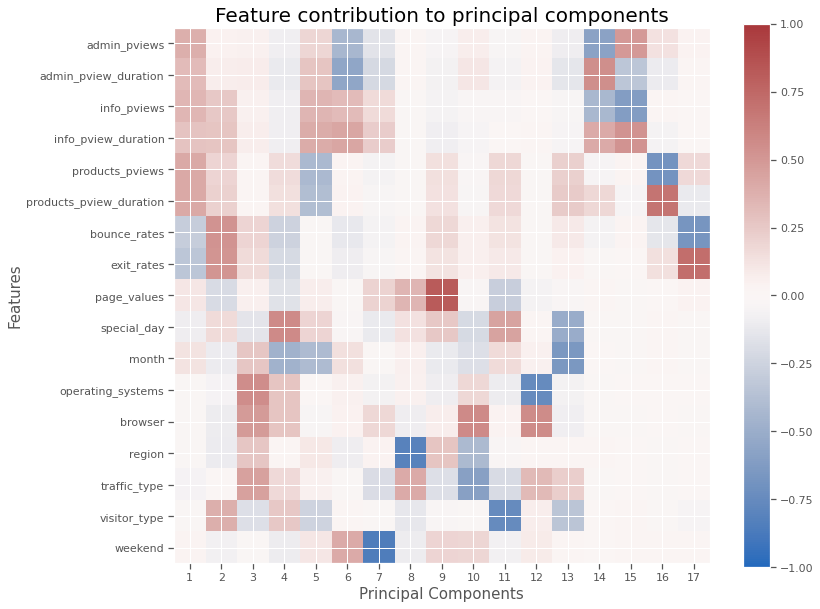

In [46]:
# plotting the feature contribution to each PCA component
fig, ax = plt.subplots(figsize=(12, 10))
plt.imshow(pca_fit_initial.components_.transpose(), vmin =-1, vmax = 1, cmap = 'vlag')

plt.yticks(ticks=range(pca_fit_initial.n_features_), labels=pca_fit_initial.feature_names_in_)
plt.xticks(ticks=range(pca_fit_initial.n_components_), labels=range(1, pca_fit_initial.n_components_+1))
plt.xlabel('Principal Components', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Feature contribution to principal components', fontsize=20)

plt.colorbar()
plt.show()

<strong>Assessing the optimal number of components</strong>

We can examine how the number of components differ as we increase the variance explained using below plot. It can help us to choose the variance we like to be explained if we already don't have a specific threshold in mind.

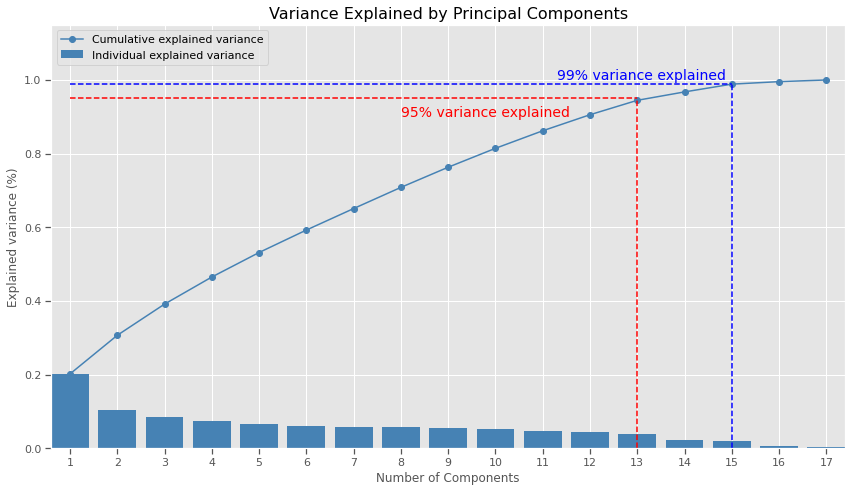

In [47]:
# plotting variance explained by number of components
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(1, pca_fit_initial.n_components_+1)
y = np.cumsum(pca_fit_initial.explained_variance_ratio_)

ax.bar(x=x, height=pca_fit_initial.explained_variance_ratio_, color='steelblue', label='Individual explained variance')
ax.plot(x, y, marker='o', color='steelblue', label='Cumulative explained variance')

ax.set_xticks(np.arange(1, pca_fit_initial.n_components_+1))
ax.set(xlabel='Number of Components', ylabel='Explained variance (%)')
ax.set_title('Variance Explained by Principal Components', fontsize=16)

ax.hlines(y=0.95, xmin=1, xmax=13 , color='r', linestyle='--')
ax.vlines(x=13, ymin=0, ymax=0.95 , color='r', linestyle='--')
ax.annotate('95% variance explained', xy=(8, 0.9), color = 'red', fontsize=14)

ax.hlines(y=0.99, xmin=1, xmax=15 , color='b', linestyle='--')
ax.vlines(x=15, ymin=0, ymax=0.99 , color='b', linestyle='--')
ax.annotate('99% variance explained', xy=(11.3, 1), color = 'b', fontsize=14)

ax.margins(0)
plt.ylim(0, 1.15)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<strong>Selecting the optimal number of components</strong>

We have decided to go with 98% variance explained which would give us 15 principal components.

In [48]:
# transforming the scaled training set by PCA
var_threshold = 0.98
pca_fit = PCA(n_components=var_threshold).fit(df_X_train_scaled_sc)
df_X_train_scaled_sc_pca = pd.DataFrame(pca_fit.transform(df_X_train_scaled_sc))

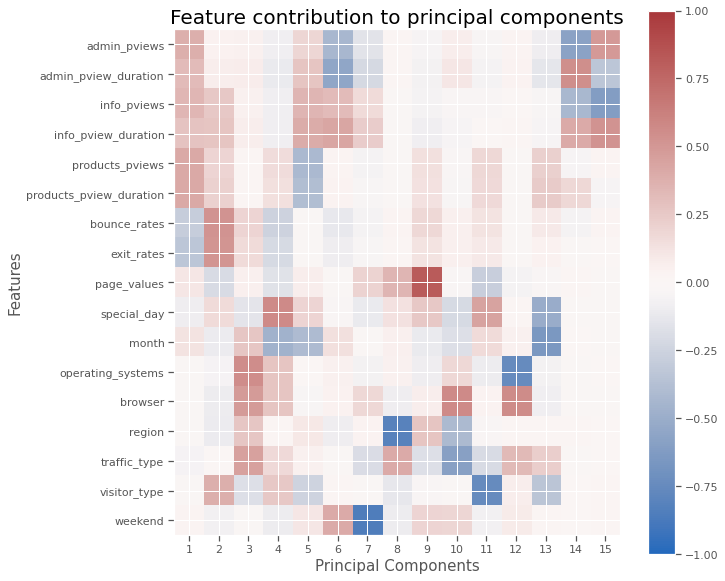

In [49]:
# plotting the feature contribution to each PCA component
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(pca_fit.components_.transpose(), vmin =-1, vmax = 1, cmap = 'vlag')

plt.yticks(ticks=range(pca_fit.n_features_), labels=pca_fit.feature_names_in_)
plt.xticks(ticks=range(pca_fit.n_components_), labels=range(1, pca_fit.n_components_+1))
plt.xlabel('Principal Components', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Feature contribution to principal components', fontsize=20)

plt.colorbar()
plt.show()

Finding the most important feature in each principal component:

In [50]:
# creating a df for most important feature and its value for each component
component_names = [f'pca_{i+1}' for i in range(pca_fit.n_components_)]

# finding the index for the highest value in each PCA component
most_important_features_index = [(np.abs(pca_fit.components_[i]).argmax()) for i in range(pca_fit.n_components_)]
most_important_features_value = [(np.abs(pca_fit.components_[i]).max()) for i in range(pca_fit.n_components_)]

most_important_feature_per_component = []
for index in most_important_features_index:
    most_important_feature_per_component.append((pca_fit.feature_names_in_[index]))

df_most_important_features = pd.DataFrame(data=most_important_feature_per_component, index=component_names, columns=['feature'])
df_most_important_features['value'] = most_important_features_value
df_most_important_features

,feature,value
pca_1,products_pview_duration,0.410259
pca_2,bounce_rates,0.523284
pca_3,operating_systems,0.548783
pca_4,special_day,0.568326
pca_5,products_pviews,0.416258
pca_6,admin_pview_duration,0.553000
pca_7,weekend,0.846361
pca_8,region,0.811978
pca_9,page_values,0.818394
pca_10,traffic_type,0.586457


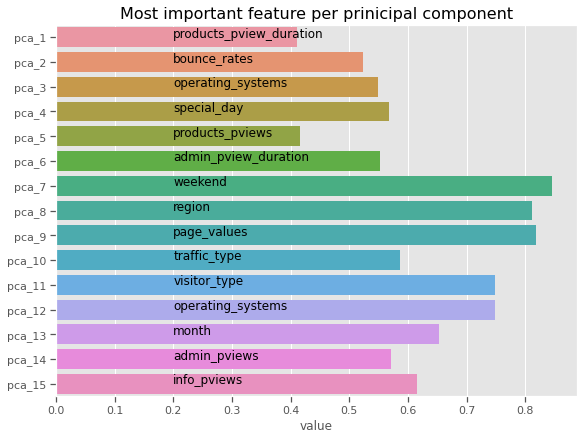

In [51]:
# plotting the most important feature per component
fig, axs = plt.subplots(figsize=(8, 6), constrained_layout=True)
sns.barplot(data=df_most_important_features, y=df_most_important_features.index, x=df_most_important_features.value, ci=None, orient='h')

for i in range(len(df_most_important_features)):
    plt.annotate(df_most_important_features.iloc[i, 0], xy=(0.2, i))

plt.title('Most important feature per prinicipal component', fontsize=16)
plt.xlabel('value')
plt.show()

#### Handling Imbalanced Data

As we can see below, we have a moderate imbalance in the distribution of the target class.<br/>
NOTE: we used a stratify method in our train-test splitting so the distribution of the training set reflects the overal distribution of classes.

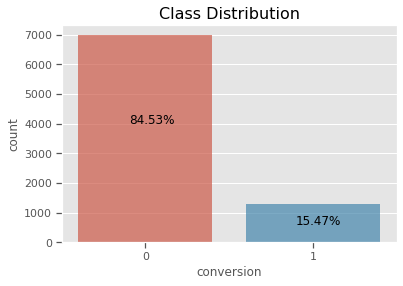

In [53]:
# plotting conversions categories for y train
category_pct = y_train.value_counts(normalize=True).mul(100).round(2)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, alpha=0.7, order=category_pct.index)
plt.annotate(f'{str(category_pct[0])}%', xy=(-0.1, 4000))
plt.annotate(f'{str(category_pct[1])}%', xy=(0.9, 600))

plt.title(f'Class Distribution', fontsize=16)
plt.show()

We can try 3 different approaches for handling the imbalance and see how they perform:
1. Leaving the data as is
2. Random Over Sampling of the minority class using RandomOverSampler
3. Over-sampling of the minority class and under-sampling the majority class using SMOTETomek

##### No Imbalance Handling

The below chart shows a matrix of scatter plots between PCA components when the data left as is. We can use it as a baseline visualization to see how the coverage of minority class changes as we use other strategies.

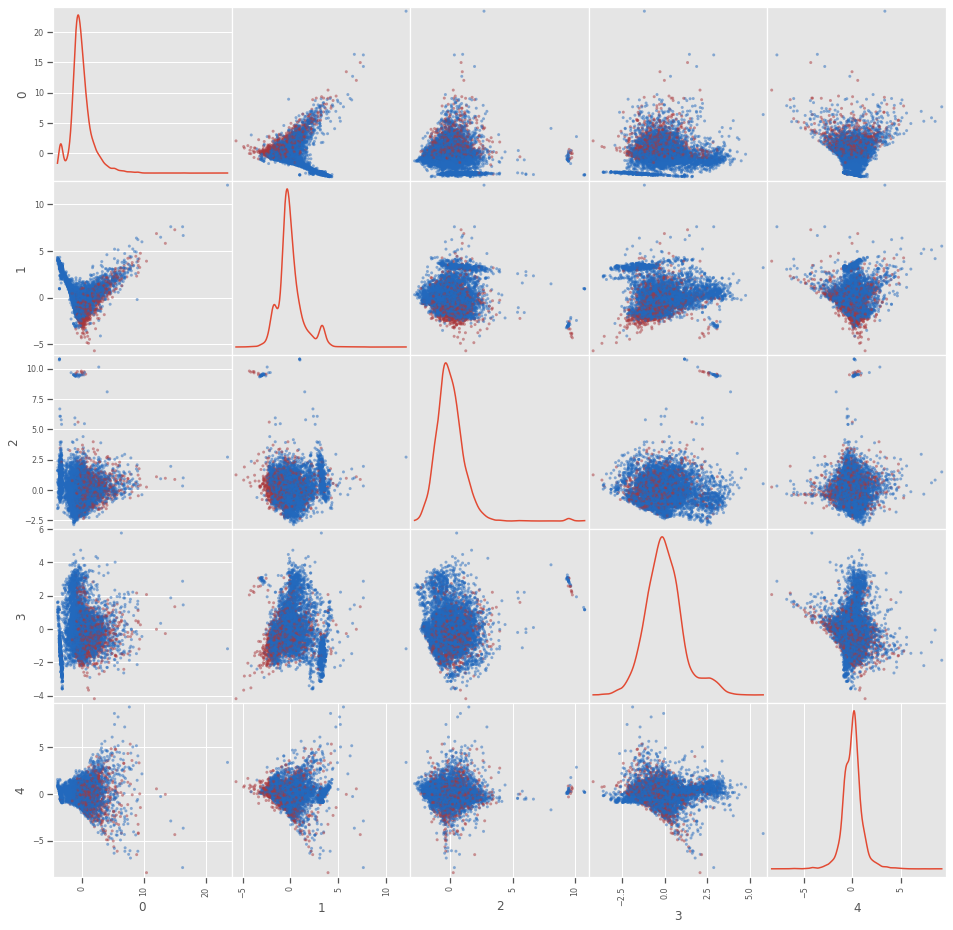

In [54]:
# plotting a matrix of scatter plots for the top 5 PCA components by conversion class (red is the minority class)
pd.plotting.scatter_matrix(df_X_train_scaled_sc_pca.iloc[:, :5], c=y_train, cmap='vlag', alpha=0.5, diagonal= 'kde', figsize=(16, 16))
plt.show()

##### Resampling with RandomOverSampler

With random oversampling, we generate new samples by resampling with replacement from the minority class. So we basically duplicate the existing samples and do not generate new samples.

In [55]:
# we have 8259 samples before resampling
df_X_train_scaled_sc_pca.shape

(8259, 15)

In [56]:
# resampling the minority class using RandomOverSampler
sampling_strategy_ros = 'minority'

ros = RandomOverSampler(sampling_strategy=sampling_strategy_ros, random_state=RANDOM_STATE)
X_train_scaled_sc_pca_ros, y_train_ros = ros.fit_resample(df_X_train_scaled_sc_pca, y_train)

# class distribution after resampling
y_train_ros.value_counts(normalize=True).mul(100).round(2)

0    50.0
1    50.0
Name: conversion, dtype: float64

In [57]:
# we have 13962 samples after resampling
df_X_train_scaled_sc_pca_ros = pd.DataFrame(X_train_scaled_sc_pca_ros, columns=df_X_train_scaled_sc_pca.columns)
df_X_train_scaled_sc_pca_ros.shape

(13962, 15)

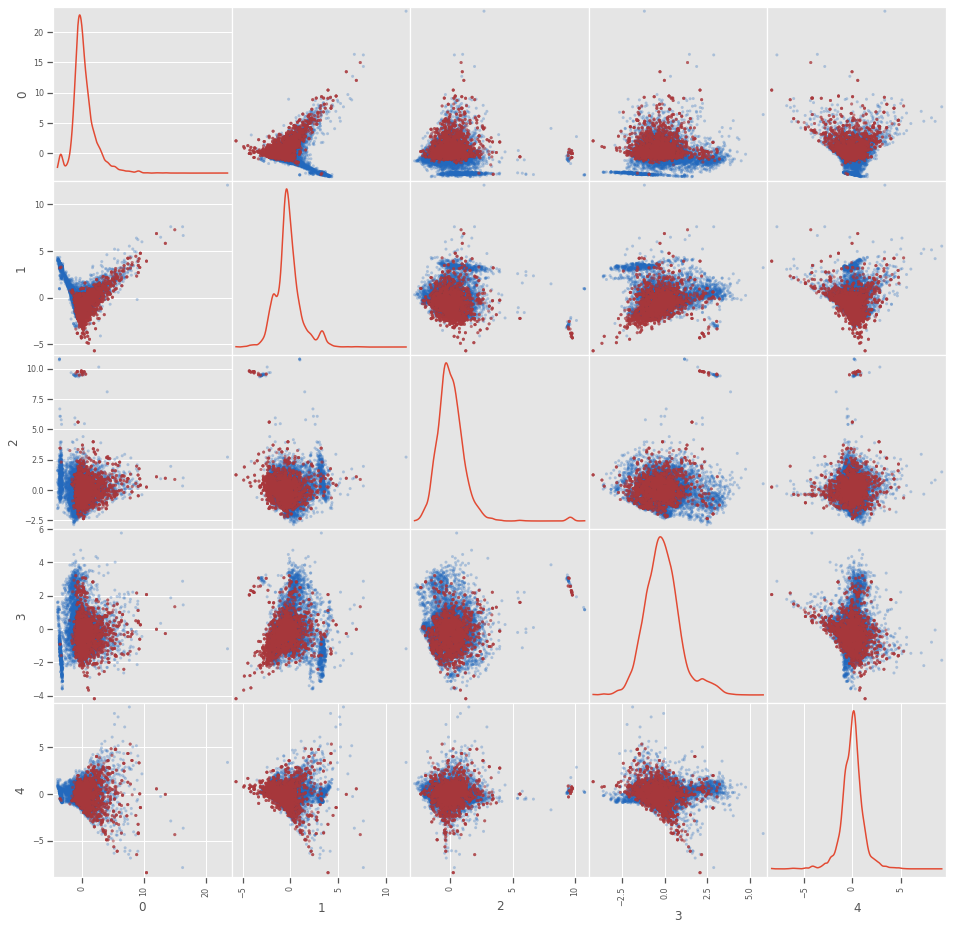

In [58]:
# checking the distribution of new samples in the top 5 PCAs by conversion class (red is the minority class)
pd.plotting.scatter_matrix(df_X_train_scaled_sc_pca_ros.iloc[:, :5], c=y_train_ros, cmap='vlag', alpha=0.3, diagonal= 'kde', figsize=(16, 16))
plt.show()

##### SMOTE-Tomek Links method

With SMOTETomek, we oversample our minority class and undersample the majority class. This method can be quite slow on large datasets. 

In [59]:
# using SMOTETomek to address imbalance
sampling_strategy_smt = 'minority'

smt = SMOTETomek(sampling_strategy=sampling_strategy_smt, random_state=RANDOM_STATE)
X_train_scaled_sc_pca_smt, y_train_smt = smt.fit_resample(df_X_train_scaled_sc_pca, y_train)

y_train_smt.value_counts(normalize=True).mul(100).round(2)

0    50.0
1    50.0
Name: conversion, dtype: float64

In [60]:
# we have 13898 samples after resampling increased from the original 8259
df_X_train_scaled_sc_pca_smt = pd.DataFrame(X_train_scaled_sc_pca_smt, columns=df_X_train_scaled_sc_pca.columns)
df_X_train_scaled_sc_pca_smt.shape

(13898, 15)

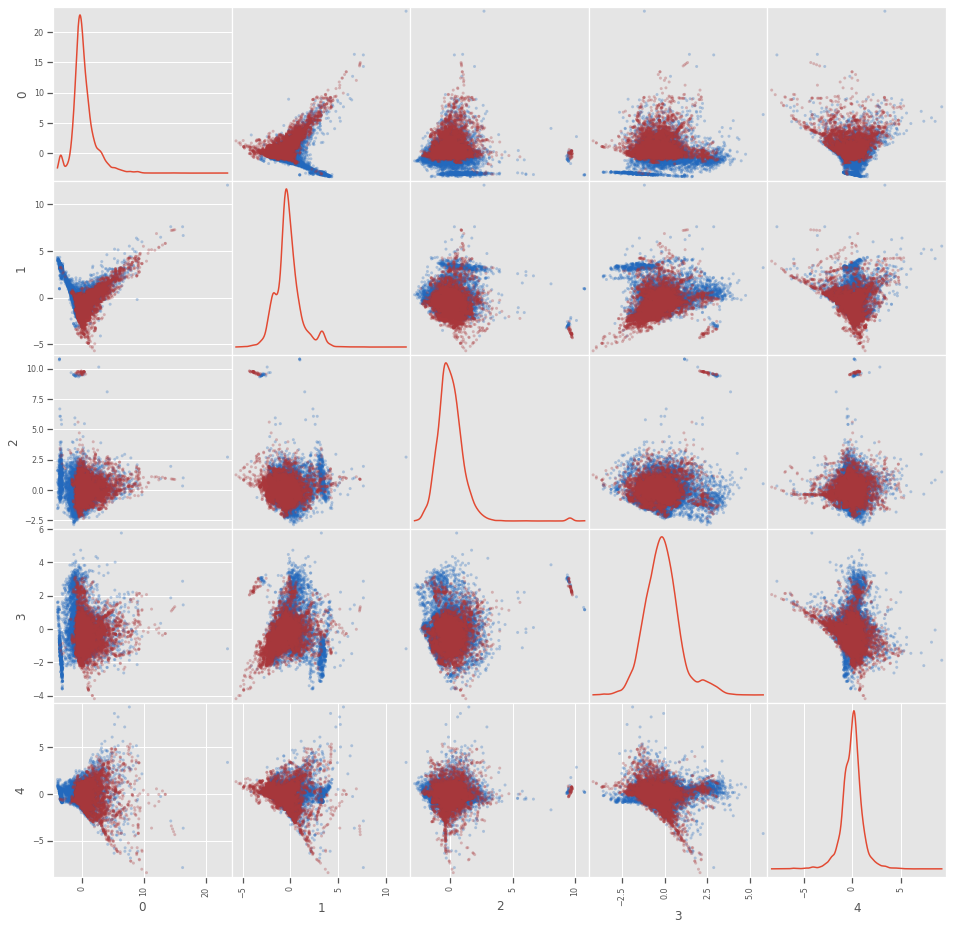

In [61]:
# checking the distribution of new samples in the top 5 PCAs by conversion class (red is the minority class)
pd.plotting.scatter_matrix(df_X_train_scaled_sc_pca_smt.iloc[:, :5], c=y_train_smt, cmap='vlag', alpha=0.3, diagonal= 'kde', figsize=(16, 16))
plt.show()

### ML Pipeline

#### Designing the Pipeline

Now that we have some idea how the cleaning and preprocessing on our data looks like, we set up a pipeline to perform these steps  autimatically.

##### Data loading & cleaning

In [63]:
# Random State
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Data Preperation

url = r'C:\Users\mahno\_projects_data\online_shoppers_intention.csv'
df = pd.read_csv(url)
df.columns = df.columns.str.lower()
df.rename(columns={'administrative': 'admin_pviews', 'administrative_duration':'admin_pview_duration', 
    'informational': 'info_pviews', 'informational_duration': 'info_pview_duration', 'productrelated': 'products_pviews', 
    'productrelated_duration': 'products_pview_duration', 'bouncerates': 'bounce_rates', 
    'exitrates': 'exit_rates', 'pagevalues': 'page_values', 'specialday': 'special_day',
    'operatingsystems': 'operating_systems', 'traffictype': 'traffic_type', 'visitortype': 'visitor_type', 
    'revenue': 'conversion'
    }, inplace=True)

# Instead of cleaning below columns at this stage, we can pass them to preprocessing pipelines and utilize encoders
df['weekend'] = np.where(df['weekend']==True, 1, 0)
df['conversion'] = np.where(df['conversion']==True, 1, 0)
df['visitor_type'] = np.where(df['visitor_type']=='Returning_Visitor', 1, 0) 

def downcast_df(df):
    
    ## downcasting floats
    f_cols= df.select_dtypes(['float', 'float64']).columns
    df[f_cols] = df[f_cols].apply(pd.to_numeric, downcast='float')

    ## downcasting ints
    i_cols = df.select_dtypes(['integer', 'int', 'int32']).columns
    df[i_cols] = df[i_cols].apply(pd.to_numeric, downcast='unsigned')

    return df

df = downcast_df(df)

##### Train_test split

In [64]:
# creating features df and target variable series
X = df.drop(columns=['conversion'])
y = df['conversion']

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

##### Preprocessing

We will use different preprocessing methods on different columns, so we divide them as below to use them in the function.

In [65]:
# dividing columns to 
continuous_features = ['admin_pviews', 'admin_pview_duration', 'info_pviews', 'info_pview_duration', 'products_pviews', 'products_pview_duration', 'bounce_rates', 'exit_rates', 'page_values']
categorical_features = ['special_day', 'month', 'operating_systems', 'browser', 'region', 'traffic_type', 'visitor_type', 'weekend']

# seperating columns based on required encoding method
cat_features_ordinal = ['month'] # ordinal encoding
cat_features_OHE = ['operating_systems', 'browser', 'region', 'traffic_type'] # One-Hot Encoding
cat_features_passthrough = ['special_day', 'visitor_type', 'weekend'] # no encoding

Below we create a function to perform preprocessing on our columns using ColumnTransformer.

In [66]:
# preprocessing data for model fitting

def preprocess():

    start_time = time.time()

    # transforming numerical features

    continuous_features = ['admin_pviews', 'admin_pview_duration', 'info_pviews', 'info_pview_duration', 'products_pviews', 'products_pview_duration', 'page_values']
    continuous_features_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('power', PowerTransformer(method='yeo-johnson', standardize=True))
        ])

    # transforming categorical features

    cat_features_ordinal = ['month']
    cat_features_ordinal_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), 
        ('ordinal_encoder', OrdinalEncoder(categories=[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]))
        ])

    cat_features_ohe = ['operating_systems', 'browser', 'region', 'traffic_type']
    cat_features_ohe_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), 
        ('ohe_encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ])

    # Creating column transformer

    preprocessor = ColumnTransformer(transformers=[
        ('num_skewed', continuous_features_transformer, continuous_features), 
        ('cat_ordinal', cat_features_ordinal_transformer, cat_features_ordinal),
        ('cat_ohe', cat_features_ohe_transformer, cat_features_ohe)],
        remainder='passthrough'
        )

    return preprocessor

##### Fitting the model

Below we create a function to fit the model based on the pipeline of our choosing.<br/>
Different pipelines allow us to see which preprocessing steps help our model the best.

In [67]:
# fitting the model based on selected pipeline

def fit_model(pipe, preprocessor, classifier, X_train, y_train):

    start_time = time.time()

    if pipe == 'pipe1':
        
        # performing only the initial preprocessing before fitting the model
        pipe1 = imbpipeline(steps=[
            ('preprocessor', preprocessor),   
            ('classifier', classifier)
            ])

        fitted_model = pipe1.fit(X_train, y_train)

    elif pipe == 'pipe2':

        # performing the initial preprocessing and oversampling before fitting the model
        pipe2 = imbpipeline(steps=[
            ('preprocessor', preprocessor),
            ('over_sample', RandomOverSampler(sampling_strategy='minority', random_state=RANDOM_STATE)),        
            ('classifier', classifier)
            ])

        fitted_model = pipe2.fit(X_train, y_train)

    elif pipe == 'pipe3':

        # performing the initial preprocessing, PCA and oversampling before fitting the model
        pipe3 = imbpipeline(steps=[
            ('preprocessor', preprocessor),
            ('pca', PCA(n_components=0.95, random_state=RANDOM_STATE)),
            ('over_sample', RandomOverSampler(sampling_strategy='minority', random_state=RANDOM_STATE)),        
            ('classifier', classifier)
            ])

        fitted_model = pipe3.fit(X_train, y_train)
    
    elif pipe == 'pipe4':   #tested pca after sampling -> results were very bad

        # performing the initial preprocessing, PCA and SMOTETomek resampling before fitting the model
        pipe4 = imbpipeline(steps=[
            ('preprocessor', preprocessor),
            ('pca', PCA(n_components=0.95, random_state=RANDOM_STATE)),
            ('smote', SMOTETomek(sampling_strategy='minority', random_state=RANDOM_STATE)),        
            ('classifier', classifier)
            ])

        fitted_model = pipe4.fit(X_train, y_train)

    else:

        return f'Enter correct pipe name'

    fit_time_sec = round((time.time() - start_time),2)

    return fitted_model, fit_time_sec

##### Evaluating the model
We create a function to calculate multiple performance metrics for us. With that we can select the model that meets our performance measure requirement.

In [68]:
# calclating performance metrics 
def evaluate_model(fitted_model, fit_time_sec, classifier, X_test, y_train, y_test):
      
    y_pred = fitted_model.predict(X_test)

    model = str(classifier)[:str(classifier).rfind('(')]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fn_rate = fn/(tp+fn)
    tn_rate = tn/(tn+fp)
    fp_rate = 1 - tn_rate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    p, r, _ = precision_recall_curve(y_test, y_pred)
    pr_auc = auc(r, p) # auc(recall, precision)
   
    model_metrics = {
    'model': model,
    'fit_time_sec': fit_time_sec,
    'tp': tp,
    'tn': tn,
    'fp': fp,
    'fn': fn,
    'correct': tp+tn,
    'incorrect': fp+fn,
    'fn_rate' : round(fn_rate, 3),
    'tn_rate' : round(tn_rate, 3),
    'fp_rate' : round(fp_rate, 3),
    'pr_auc' : round(pr_auc, 3),
    'roc_auc': round(roc_auc, 3),
    'accuracy': round(accuracy, 3),
    'precision': round(precision, 3),
    'recall': round(recall, 3),
    'f1': round(f1, 3),
    'avg_precision': round(avg_precision, 3)
    }
    
    return model_metrics

##### Comparing models

The below function allows us to fit and evaluate multiple models at once.<br/>
The function invokes the preprocessing, model fitting and performance evaluation functions we built earlier and allows us to feed multiple classifiers to the function and get the performance metrics for them.

In [69]:
# calculating performance metrics for input classifiers 
def compare_models(classifiers, X_train, X_test, y_train, y_test):
    
    # creating the output dataframe
    columns = ['model','pipe','fit_time_sec','tp','tn','fp','fn','correct','incorrect','fn_rate','tn_rate','fp_rate',
                'roc_auc','pr_auc','accuracy', 'precision','recall','f1','avg_precision']
    df_model_compare = pd.DataFrame(columns=columns)

    # instantiating the preprocess function
    preprocessor = preprocess()

    # list of pipelines that we created in fit_model function
    pipes = ['pipe1', 'pipe2', 'pipe3', 'pipe4']

    # looping through pipelines and classifiers and calculating metrics for each model
    for pipe in pipes:
        for classifier in classifiers:
            
            fitted_model, fit_time_sec = fit_model(pipe, preprocessor, classifier, X_train, y_train)
            model_metrics = evaluate_model(fitted_model, fit_time_sec, classifier, X_test, y_train, y_test)
            
            model_metrics.update({'pipe': pipe})
            
            df_model_compare = df_model_compare.append(model_metrics, ignore_index=True)

    return df_model_compare

#### Pipeline implementation

##### Selecting the performance metric

As pointed out in the project description, the business wants to classify the website vistors based on the likelihood of conversion and give the likely convertors a free music to download. </br>
Since giving the free muisc is costly for the business, especially when the visitor doesn't buy any other music, it is important to find a model that can effectively classify the convertors and non-convertors. The metric we choose to estimate such level of separability will be ROC-AUC to balance between false positives and false negatives.

##### Selecting classifiers

We select below classifiers to model our data.

In [70]:
# list of classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=5), 
    DecisionTreeClassifier(random_state=RANDOM_STATE),
    BaggingClassifier(random_state=RANDOM_STATE),
    AdaBoostClassifier(random_state=RANDOM_STATE),
    RandomForestClassifier(random_state=RANDOM_STATE),
    LGBMClassifier(random_state=RANDOM_STATE),
    XGBClassifier(verbosity = 0, random_state=RANDOM_STATE), 
    GradientBoostingClassifier(random_state=RANDOM_STATE)
]

We run the compare_models function we created earlier to get performance metric for our list of classifiers.

In [71]:
# getting metrics for each classifier
df_models_metrics = compare_models(classifiers, X_train, X_test, y_train, y_test)
df_models_metrics.loc[df_models_metrics.model.str.contains('XGBClassifier'), 'model'] = 'XGBClassifier'

In [72]:
# sorting the outcome of compare_models() by roc_auc values
df_models_metrics = df_models_metrics.sort_values(by=['roc_auc'], ascending=False)
df_models_metrics.reset_index(drop=True, inplace=True)
df_models_metrics

,model,pipe,fit_time_sec,tp,tn,fp,fn,correct,incorrect,fn_rate,tn_rate,fp_rate,roc_auc,pr_auc,accuracy,precision,recall,f1,avg_precision
0,GradientBoostingClassifier,pipe2,12.71,509,3015,424,121,3524,545,0.192,0.877,0.123,0.842,0.692,0.866,0.546,0.808,0.651,0.471
1,GradientBoostingClassifier,pipe3,8.33,508,2980,459,122,3488,581,0.194,0.867,0.133,0.836,0.681,0.857,0.525,0.806,0.636,0.454
2,GradientBoostingClassifier,pipe4,10.58,499,2996,443,131,3495,574,0.208,0.871,0.129,0.832,0.677,0.859,0.530,0.792,0.635,0.452
3,AdaBoostClassifier,pipe3,2.50,500,2988,451,130,3488,581,0.206,0.869,0.131,0.831,0.676,0.857,0.526,0.794,0.633,0.449
4,AdaBoostClassifier,pipe2,2.27,488,3036,403,142,3524,545,0.225,0.883,0.117,0.829,0.679,0.866,0.548,0.775,0.642,0.459
5,LGBMClassifier,pipe3,0.65,474,3077,362,156,3551,518,0.248,0.895,0.105,0.824,0.679,0.873,0.567,0.752,0.647,0.465
6,LGBMClassifier,pipe2,0.70,470,3073,366,160,3543,526,0.254,0.894,0.106,0.820,0.674,0.871,0.562,0.746,0.641,0.459
7,AdaBoostClassifier,pipe4,2.93,473,3023,416,157,3496,573,0.249,0.879,0.121,0.815,0.661,0.859,0.532,0.751,0.623,0.438
8,LGBMClassifier,pipe4,1.19,455,3100,339,175,3555,514,0.278,0.901,0.099,0.812,0.669,0.874,0.573,0.722,0.639,0.457
9,KNeighborsClassifier,pipe4,0.95,501,2832,607,129,3333,736,0.205,0.823,0.177,0.809,0.640,0.819,0.452,0.795,0.577,0.391


##### Selecting the best model using Cross-Validation

Looking at the above table, out of 8 models we tested, 2 stand at the top in terms of ROC-AUC score with GradientBoostingClassifier being the best one. We perform another round of evaluation, this time using cross-validation to select the best model out of the top 2.<br/>
The table also reveals that the pipeline 4 (pipe4) is not as performant as the rest of the pipelines among the top 2 modles, so we won't be using it in our cross validation.

In [73]:
top_classifiers = [
    GradientBoostingClassifier(random_state=RANDOM_STATE),
    AdaBoostClassifier(random_state=RANDOM_STATE)
]

In [74]:
# evaluating models using cross-validation
def compare_top_models_w_cv(top_classifiers, X_train, X_test, y_train, y_test):
    
    df_top_models_compare = pd.DataFrame(columns=['model', 'roc_auc', 'roc_auc_std', 'pipe'])

    preprocessor = preprocess()
    pipes = ['pipe1', 'pipe2', 'pipe3']

    for pipe in pipes:
        for classifier in top_classifiers:
            
            fitted_model, _ = fit_model(pipe, preprocessor, classifier, X_train, y_train)          
            cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=RANDOM_STATE)
            scoring = make_scorer(roc_auc_score)
            cv_scores = cross_val_score(fitted_model, X_test, y_test, cv=cv, scoring=scoring)
            
            model_metrics = {
                'model': str(classifier)[:str(classifier).rfind('(')],
                'roc_auc': cv_scores.mean(),
                'roc_auc_std': cv_scores.std(),
                'pipe': pipe
            }
            
            df_top_models_compare = df_top_models_compare.append(model_metrics, ignore_index=True)

    return df_top_models_compare

In [75]:
df_top_models_compare = compare_top_models_w_cv(top_classifiers, X_train, X_test, y_train, y_test)

GradientBoostingClassifier(GBM) has outperformed AdaBoost so we select GBM using pipeline 2 (pipe2) and continue to the next step for hypertuning.

In [76]:
# evaluating the modles
df_top_models_compare = df_top_models_compare.sort_values(by=['roc_auc'], ascending=False)
df_top_models_compare

,model,roc_auc,roc_auc_std,pipe
2,GradientBoostingClassifier,0.839242,0.016343,pipe2
4,GradientBoostingClassifier,0.832510,0.017760,pipe3
3,AdaBoostClassifier,0.822148,0.016295,pipe2
5,AdaBoostClassifier,0.813660,0.015594,pipe3
0,GradientBoostingClassifier,0.756109,0.020808,pipe1
1,AdaBoostClassifier,0.739406,0.022710,pipe1


##### Hyperparameter tuning

Now that we have selected the best base model, we use hyperparameter tuning to increase its performance even furthur. For hyperparameter tuning, we can use different techniques such as grid search or random search. For this project, we will do some grid search tuning with cross validation at a small scale. 

Our GBM baseline performance score is 0.839242 with 0.016343 standard deviation using the pipeline 2 (pipe2). <br/>
Below are the parameters that we can work with in the tuning process:
- loss{‘deviance’, ‘exponential’}, default=’deviance’
- learning_ratefloat, default=0.1
- n_estimatorsint, default=100
- subsamplefloat, default=1.0
- criterion{‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}, default=’friedman_mse’
- min_samples_splitint or float, default=2
- min_samples_leafint or float, default=1
- min_weight_fraction_leaffloat, default=0.0
- max_depthint, default=3
- min_impurity_decreasefloat, default=0.0
- initestimator or ‘zero’, default=None
- random_stateint, RandomState instance or None, default=None
- max_features{‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None
- verboseint, default=0
- max_leaf_nodesint, default=None
- warm_startbool, default=False
- validation_fractionfloat, default=0.1
- n_iter_no_changeint, default=None
- tolfloat, default=1e-4
- ccp_alphanon-negative float, default=0.0

Before we attempt to perform the model hyperparameter tunning, first we check if we can improve the model by tuning the sampling strategy. <br/>
The base model uses 'minority' strategy which resamples only the minority class. We change the strategy to ratio which is the ratio of the number of samples in the minority class over the number of samples in the majority class after resampling to see if the model's performance improves. <br/>

<string>Tunning the Ssampling strategy</strong>

In [77]:
# pipeline 2 (pipe2) used for the model
pipe = imbpipeline(steps=[
    ('preprocessor', preprocess()),
    ('over_sample', RandomOverSampler(random_state=RANDOM_STATE)),        
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=RANDOM_STATE))
    ])

# model tunning with GridSearch
param_grid_1 = {
    'over_sample__sampling_strategy': [0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.0]
}

# selecting the evaluation metric
scorer = 'roc_auc'

# building the gridsearch
grid_1 = GridSearchCV(
    pipe,
    param_grid=param_grid_1,
    cv=5,
    n_jobs=3, 
    scoring=scorer,
    return_train_score=True
)

# fitting the model
grid_1.fit(X_train, y_train)

# printing the metrics
print(f'Best params: {grid_1.best_params_}')
print(f'Best score: {grid_1.best_score_}')
for i in ['mean_test_score', 'std_test_score', 'params']:
    print(i," : ",grid_1.cv_results_[i])

Best params: {'over_sample__sampling_strategy': 0.8}
Best score: 0.9317582679714725
mean_test_score  :  [0.93066655 0.93126207 0.93106517 0.93112178 0.93154823 0.93118842
 0.93175827 0.9315436  0.93157245 0.93159878 0.93080616]
std_test_score  :  [0.00762549 0.00719496 0.00654545 0.00708268 0.00775713 0.00715333
 0.00726598 0.00739192 0.00686584 0.00795422 0.00702974]
params  :  [{'over_sample__sampling_strategy': 0.5}, {'over_sample__sampling_strategy': 0.55}, {'over_sample__sampling_strategy': 0.6}, {'over_sample__sampling_strategy': 0.65}, {'over_sample__sampling_strategy': 0.7}, {'over_sample__sampling_strategy': 0.75}, {'over_sample__sampling_strategy': 0.8}, {'over_sample__sampling_strategy': 0.85}, {'over_sample__sampling_strategy': 0.9}, {'over_sample__sampling_strategy': 0.95}, {'over_sample__sampling_strategy': 1.0}]


We build a function to plot ROC curve and the area under curve (AUC)

In [78]:
# plotting ROC-AUC
def plot_roc_auc(grid, title='Grid Search'):
    fig, ax = plt.subplots(figsize=(10, 6))
    RocCurveDisplay.from_estimator(grid, X_test, y_test, ax=ax)
    ax.set_title(title, fontsize=16)
    plt.show()

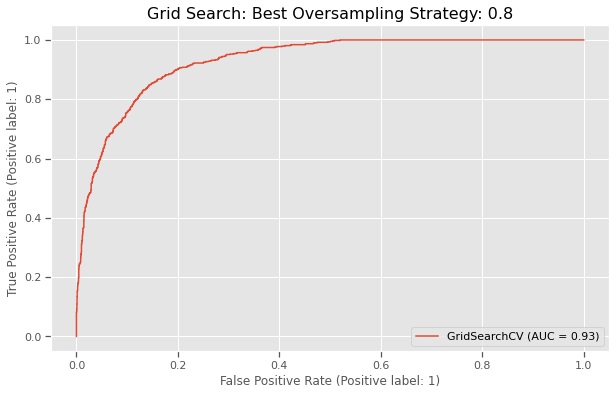

In [79]:
plot_roc_auc(grid_1, title='Grid Search: Best Oversampling Strategy: 0.8')

We also build another function to get parameters from grid search so we can see how performance differs by input.

In [80]:
# returning the parameters dataframe
def get_grid_params(grid):
    
    cols = ['mean', 'std']
    for k in grid.best_params_.keys():
        cols.append(k[k.rfind('__')+2:])
    
    for key, value in grid.cv_results_.items():
        if key == 'params':
            param_values_l = []
            for i in range(len(value)):          
                for param_value in value[i].values():
                    param_values_l.append(param_value)
            param_values = np.array(param_values_l).reshape(len(value), len(value[0]))

        if key == 'mean_test_score':
            mean_test_score = value.reshape(-1, 1)
        if key == 'std_test_score':
            std_test_score = value.reshape(-1, 1)
            
    test_score_params = pd.DataFrame(np.hstack((mean_test_score, std_test_score, param_values)), columns=cols).sort_values(by=['mean', 'std'], ascending=[False, True]).reset_index(drop=True)
    
    return test_score_params

In [81]:
get_grid_params(grid_1)

,mean,std,sampling_strategy
0,0.931758,0.007266,0.80
1,0.931599,0.007954,0.95
2,0.931572,0.006866,0.90
3,0.931548,0.007757,0.70
4,0.931544,0.007392,0.85
5,0.931262,0.007195,0.55
6,0.931188,0.007153,0.75
7,0.931122,0.007083,0.65
8,0.931065,0.006545,0.60
9,0.930806,0.007030,1.00


The 0.8 ratio sampling strategy was able to improve the model performance from 0.839242 to 0.931758 which is a significant improvement in the model performance.

Now, we set the sampling_strategy to 0.8 and create the below function to automatically perform the grid search.

In [82]:
# fitting the model using gridsearch and cv
def fit_w_gridsearch(model, param_grid, scorer):

    # selecting the best sampling strategy
    sampling_strategy = 0.8

    # creating pipeline 2 (pipe2) used for the model
    pipe = imbpipeline(steps=[
        ('preprocessor', preprocess()),
        ('over_sample', RandomOverSampler(sampling_strategy = sampling_strategy, random_state=RANDOM_STATE)),        
        ('GradientBoostingClassifier', model)
        ])

    # selecting the evaluation metric
    scorer = 'roc_auc'

    # performing gridseach with cross validation
    grid = GridSearchCV(
        pipe,
        param_grid=param_grid,
        cv=5,
        n_jobs=3, 
        scoring=scorer,
        return_train_score=True
    )

    return grid.fit(X_train, y_train)

<strong>Tuning for learning_rate and n_estimators</strong>

In [83]:
# running gridsearch for learning_rate and n_estimators parameters
model_2 = GradientBoostingClassifier(random_state=RANDOM_STATE)

param_grid_2 = {
    'GradientBoostingClassifier__learning_rate': [0.8, 0.1, 0.15, 0.2], 
    'GradientBoostingClassifier__n_estimators': [50, 100, 150, 500]
}

grid_2 = fit_w_gridsearch(model_2, param_grid_2, 'roc_auc')
get_grid_params(grid_2)

,mean,std,learning_rate,n_estimators
0,0.931758,0.007266,0.10,100.0
1,0.931412,0.007032,0.10,50.0
2,0.930698,0.006991,0.20,50.0
3,0.930616,0.006932,0.15,50.0
4,0.930462,0.007817,0.10,150.0
5,0.929924,0.007282,0.15,100.0
6,0.926944,0.008250,0.15,150.0
7,0.926259,0.009237,0.20,100.0
8,0.924060,0.009733,0.20,150.0
9,0.921612,0.009433,0.10,500.0


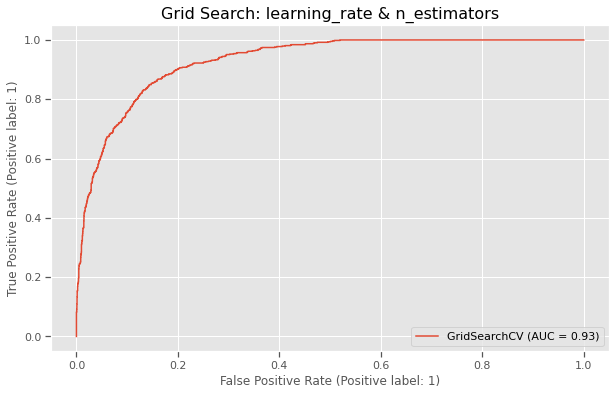

In [84]:
plot_roc_auc(grid_2, title='Grid Search: learning_rate & n_estimators')

The outcome shows the default values are the best parameters. So we move on to the next parameters to tune.

<strong>Tunning min_samples_split</strong>

In [85]:
model_3 = GradientBoostingClassifier(random_state=RANDOM_STATE)

param_grid_3 = {
    'GradientBoostingClassifier__min_samples_split': range(72, 85)
}

grid_3 = fit_w_gridsearch(model_3, param_grid_3, 'roc_auc')
get_grid_params(grid_3)

,mean,std,min_samples_split
0,0.932067,0.006855,74.0
1,0.932019,0.006840,75.0
2,0.931968,0.006803,72.0
3,0.931968,0.006803,73.0
4,0.931965,0.006759,84.0
5,0.931940,0.006748,82.0
6,0.931939,0.006748,83.0
7,0.931905,0.006733,80.0
8,0.931898,0.006805,76.0
9,0.931868,0.006718,81.0


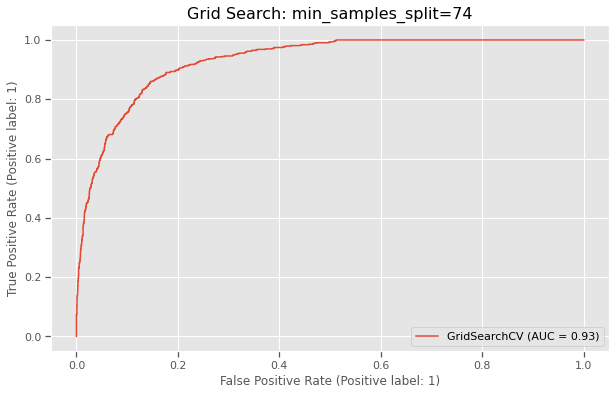

In [86]:
plot_roc_auc(grid_3, title='Grid Search: min_samples_split=74')

With min_samples_split of 74, we were able to increase the roc-auc score from 0.931758 to 0.932067 with the standard deviation of 0.006855.

<strong>Tunning min_samples_leaf</strong>

In [87]:
model_4 = GradientBoostingClassifier(min_samples_split=74, random_state=RANDOM_STATE)

param_grid_4 = {
    'GradientBoostingClassifier__min_samples_leaf': [1, 3, 10, 50, 100, 110, 130, 150, 200]
} 

grid_4 = fit_w_gridsearch(model_4, param_grid_4, 'roc_auc')
get_grid_params(grid_4)

,mean,std,min_samples_leaf
0,0.932180,0.006684,100.0
1,0.932067,0.006855,1.0
2,0.931779,0.006579,200.0
3,0.931560,0.007206,130.0
4,0.931474,0.006645,50.0
5,0.931449,0.006848,110.0
6,0.931198,0.006553,3.0
7,0.931071,0.007595,150.0
8,0.930881,0.006750,10.0


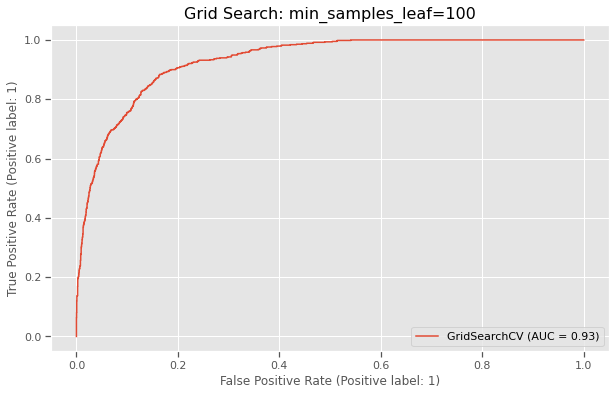

In [88]:
plot_roc_auc(grid_4, title='Grid Search: min_samples_leaf=100')

With min_samples_leaf of 100, we were able to increase the roc-auc score from 0.932067 to 0.932180 with the standard deviation of 0.006684.

We can continue trying different parameters or use RandomizedSearchCV to find them. However, for this project we conclude our hyperparameter tunning by reaching to ROC-AUC score of 0.932180